# Pillow image processing

In this notebook, we will see examples of image processing using the Pillow fork of the PIL library.  Image processing is interesting in its own right, but probably more importantly for Math 9, it provides a way to think about NumPy arrays in a visual way, including three-dimensional NumPy arrays.  (So far, we have only worked with one-dimensional and two-dimensional NumPy arrays, which we think of like vectors and matrices, respectively.)

## Pillow installation

Before you can import NumPy, you need to install NumPy.  Sounds obvious enough, but for the image processing library we will use, the procedure is slightly different.  See the following video, but briefly, we install the library using the name `Pillow`, and import the library using the name `PIL`.

<iframe width="560" height="315" src="https://www.youtube.com/embed/H6yZGRuvBw8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Opening an image

<iframe width="560" height="315" src="https://www.youtube.com/embed/ltR6DSTPh-4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In addition to importing Pillow, we will also import the `os` module (which is part of the standard Python library, so it does not need to be installed).

In [1]:
import os
from PIL import Image

We won't do much with the Pillow library in this section, but here is a quick example of using Pillow to open an image file.  In order for this command to work as written, the penguins.jpg file needs to be in the same folder as your Jupyter notebook file.

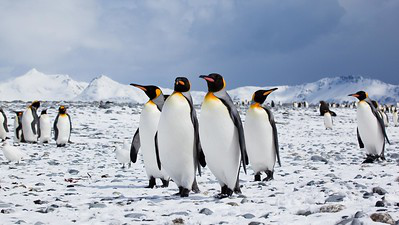

In [2]:
Image.open("penguins.jpg")

If there are many files you need to access, it is inconvenient to need to have them all in the same folder.  For the rest of this section, we will see some ways to use the `os` module to locate files.  ([Later](pathlib) we will briefly see a more modern, more object-oriented, approach to locating files, using the `pathlib` module.)

As a first example involving `os`, we can use its `getcwd` function to learn the location of the current folder (i.e., the location of the folder that your Jupyter Notebook file is in).

In [3]:
os.getcwd()

'/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/Week4'

Another useful `os` function is `listdir`, takes as input a string indicating a directory, and which returns a list of every file and directory in the input directory.  (I use the words "folder" and "directory" interchangeably.)  In the following, the string `"images"` doesn't have any special meaning related to images; instead `"images"` is just the name of a subfolder of my current folder.  In this case, we can see that the images folder contains 8 files.

In [4]:
os.listdir("images")

['penguins.jpg',
 'Seurat-var.png',
 'Seurat-orig.jpg',
 'altair.gif',
 'Davis-Square2017.png',
 'alphabet.png',
 'flowchart.jpeg',
 'test_grid.png']

If we don't pass an argument to `listdir`, then the output is a list containing all the files and folders in the current folder.  For example, we see the name of this notebook, Pillow.ipynb.  We also see the images folder mentioned above.  We also see some "hidden" files (the ones that start with a period).

In [5]:
os.listdir()

['Draft-Week4.ipynb',
 'Draft-Pillow.ipynb',
 'penguins.jpg',
 '.DS_Store',
 'images',
 'Pillow.ipynb',
 '.ipynb_checkpoints',
 'ObjectOriented.ipynb']

One of the files in the images folder was named "alphabet.png".  Let's try to open it.

In [6]:
Image.open("alphabet.png")

FileNotFoundError: [Errno 2] No such file or directory: 'alphabet.png'

An error is raised because Pillow does not know where to find the alphabet.png file.  On my Mac, I could solve this by inputting `"images/alphabet.png"`, but if I instead were on a PC, I would have to input `"images\alphabet.png"`.  That is especially annoying if you are sharing code with someone on a different system.  Luckily, there is a function in `os.path` which will automatically choose the correct separator.

In [7]:
os.path.join("images", "alphabet.png")

'images/alphabet.png'

In [8]:
s = os.path.join("images", "alphabet.png")

This variable `s` now specifies the path to the "alphabet.png" file, relative to our current location.  This path is what is needed to open the file using Pillow.

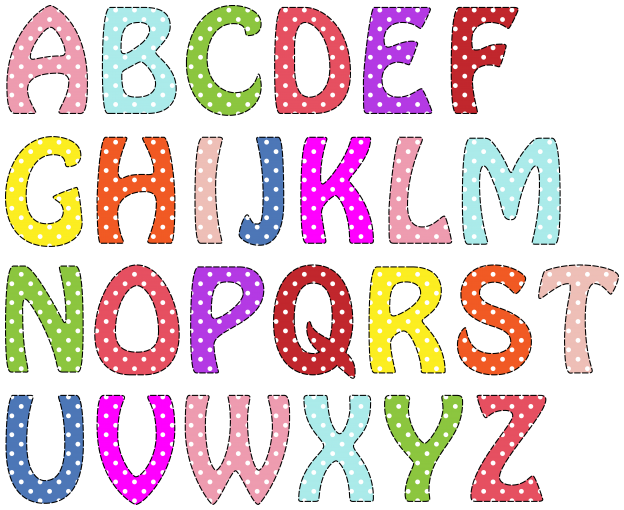

In [9]:
Image.open(s)

As a last example, let's see two ways to find all the png files in the images folder.  Here is a reminder of all the files in that folder.

In [10]:
os.listdir("images")

['penguins.jpg',
 'Seurat-var.png',
 'Seurat-orig.jpg',
 'altair.gif',
 'Davis-Square2017.png',
 'alphabet.png',
 'flowchart.jpeg',
 'test_grid.png']

Both our approaches will involve list comprehension.  The first approach uses slicing, to indicate that we want all the strings whose last 3 characters are `"png"`.

In [11]:
[x for x in os.listdir("images") if x[-3:] == "png"]

['Seurat-var.png', 'Davis-Square2017.png', 'alphabet.png', 'test_grid.png']

The second approach uses the string method `endswith`.  I think both of these approaches have their advantages.  This `endswith` approach is nice because you don't need to indicate the length of `"png"`.  The slicing approach is nice because you are more likely to know about slicing than to know about this very specific method `endswith`.

In [12]:
[x for x in os.listdir("images") if x.endswith("png")]

['Seurat-var.png', 'Davis-Square2017.png', 'alphabet.png', 'test_grid.png']

We haven't done any image processing yet.  So far, we only used the Pillow library as an excuse to talk about working with files in Python.  In the rest of this notebook, we'll work with the Pillow library much more closely.

## Images and NumPy arrays

<iframe width="560" height="315" src="https://www.youtube.com/embed/FwZAM56dqo4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The Pillow library provides us with a visual way to work with NumPy arrays, which may help make some of the earlier topics more concrete.  For example, in this section we will see *slicing* in the context of Pillow images.

In [1]:
from PIL import Image
import numpy as np

Above, we used `Image.open` to display an image in this Jupyter notebook.  That isn't usually how we will use `Image.open`.  Usually we will save the resulting object, in this case, a `JpegImageFile`, so that we can perform image processing on it.

In [2]:
img = Image.open("penguins.jpg")

In [3]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

The object `img` itself is not a NumPy array, but it can be converted to a NumPy array.  There are a few different ways to make that conversion.  We might talk about the differences later, but for now we will use the recommended way, which is to use `np.asarray`.

In [4]:
arr = np.asarray(img)

The resulting object, `arr`, is a NumPy array.

In [5]:
type(arr)

numpy.ndarray

The actual `img` variable itself is unchaned; it's still a Pillow Image object.

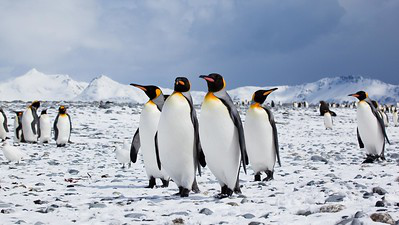

In [6]:
img

Because `arr` is a NumPy array, `arr` has all the usual attributes and methods of NumPy arrays.  For example, here is its `shape` attribute.  Notice that three different numbers are listed.  I believe this is our first example in Math 9 of a three-dimensional NumPy array.  The number `225` refers to the number of rows, the number `399` refers to the number of columns (notice that the image is wider than it is tall), and the number `3` refers to the RGB  (Red-Green-Blue) values which specify the color of a given pixel.

In [7]:
arr.shape

(225, 399, 3)

Think of `arr` like a matrix with 225 rows and 399 columns.  Each entry in this "matrix" is not a single number, but is instead a triple of numbers representing the RGB values.  For example, the upper-left-most pixel has Red value of 178, Green value of 190, and Blue value of 206.  The bigger the number, the more of that color is present in the given pixel.  (For future reference, also notice that the `dtype` is specified as `uint8`, which stands for *unsigned* 8-bit integers.  Later we will have to convert our own arrays to `dtype=np.uint8` so that Pillow can handle the data type.)

In [8]:
arr[0,0]

array([178, 190, 206], dtype=uint8)

What does a number like `178` mean in this case?  Is that a big value?  Different normalizations are possible (using real numbers between 0 and 1 is another common choice of normalization), but the normalization Pillow uses is integer values from 0 (inclusive) to 256 (exclusive).  That means there are exactly 256 options for each value, which corresponds to 8 bits or to 1 byte.

When we evaluate `arr.min()`, NumPy goes through all $225 \cdot 399 \cdot 3$ numbers in the array and checks what is the minimum value which occurs.

In [9]:
arr.min()

0

In [10]:
arr.max()

255

Here is an example of slicing in terms of the image.  Let's get every row, and  the columns from 300-th to the right.  (And because we don't specify a slice in the third dimension, in the RGB dimension, all of the RGB values will be included.)

In [11]:
(arr[:, 300:]).shape

(225, 99, 3)

Here is a reminder of how our original image looked.

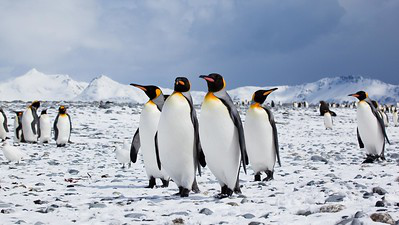

In [12]:
img

We can convert from a NumPy array (as long as it has a suitable shape and `dtype`) to a Pillow Image using `Image.fromarray`.  Here we make a Pillow Image out of our sliced NumPy array.  Notice how it is the right-most portion of the image, but with every row, and with the colors unchanged.

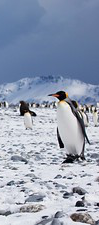

In [13]:
Image.fromarray(arr[:, 300:])

## Setting colors

<iframe width="560" height="315" src="https://www.youtube.com/embed/n1t7HpZZxp8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We've seen above how to get a portion of a Pillow Image.  Here we'll see how to change part of that Image.

In [1]:
from PIL import Image
import numpy as np

In [2]:
img = Image.open("penguins.jpg")
arr = np.asarray(img)

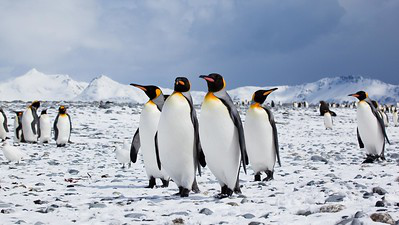

In [3]:
img

Let's say we want to change the horizontal band from row 100 to row 150 to the color black, which is represented in RGB values as `[0,0,0]`.

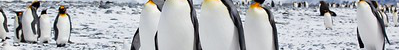

In [4]:
Image.fromarray(arr[100:150])

The following almost works, but we get an error which says that `arr` is "read-only".

In [5]:
arr[100:150] = 0

ValueError: assignment destination is read-only

To fix that, we can make a copy of `arr`, using the array's `copy` method.

In [6]:
B = arr.copy()

To understand a fundamental difference between `arr` and its copy `B`, let's look at the size of these two objects.  Not the size in terms of pixels, but the size in terms of how much space they take up in memory.  We will use the `sys` module, which is part of the Python standard library.

In [7]:
import sys

The following represents the size of `img` in bytes.  Notice how small it is, even though the picture itself looks relatively high-quality.  The size of `img` is significantly less than even a kilobyte.

In [8]:
sys.getsizeof(img)

48

The variable `arr` also is very small in relation to how much data it seems to hold; it is only 144 bytes.

In [9]:
sys.getsizeof(arr)

144

For comparison, the copy we made, `B`, is over two-hundred thousand bytes.  The fundamental difference between `img` and `arr` on one hand, and `B` on the other hand, is that `img` and `arr` are only keeping track of where to get data from on the computer (like the location of the image file with the data), whereas `B` is actually holding a copy of all of that data.

In [10]:
sys.getsizeof(B)

269469

So `B` takes up thousands of times more space than `arr`, but the benefit of `B` is that `B` is not read-only.  Because `B` is not read-only, the following assignment works without raising an error.

In [11]:
B[100:150] = 0

We have now changed many of the pixels in `B` to correspond to black.  We can view the image corresponding to `B` using `Image.fromarray`.

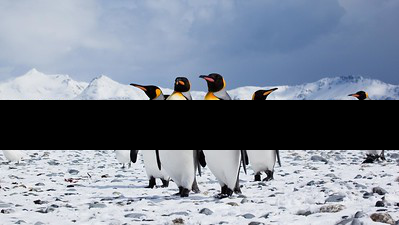

In [12]:
Image.fromarray(B)

Setting the color to white is almost identical.  White corresponds to the maximum value in each of the red, the green, and the blue slots.  Under Pillow's normalization, this maximum value is `255`.

In [13]:
B[100:150] = 255

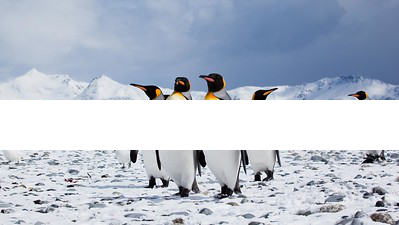

In [14]:
Image.fromarray(B)

Let's next try to set the color of this horizontal band to green, which corresponds in RGB values to `[0,255,0]`.  In order to make this assignment, let's recall the rules of broadcasting.

In [15]:
B[100:150].shape

(50, 399, 3)

In [16]:
color = np.array([0, 255, 0])

In [17]:
color.shape

(3,)

The shapes of `B[100:150]` and `color` are compatible with respect to broadcasting if, starting from the right-most dimension, the dimension sizes are either equal, or one of those dimensions is equal to 1.  In this case, the right-most dimensions of `B[100:150]` and `color` are both equal to `3`, and because `color` has no further dimensions, these shapes are compatible.

The following command is setting each of the 50 times 399 pixels in this horizontal band to be green.  The only reason this assignment works is because the shapes of `B[100:150]` and `color` are compatible with respect to broadcasting.

In [18]:
B[100:150] = color

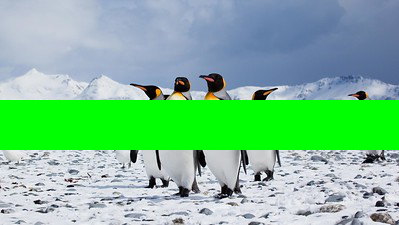

In [19]:
Image.fromarray(B)

## Making an image from scratch

<iframe width="560" height="315" src="https://www.youtube.com/embed/KhkhWZIwvdY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

So far we've gone from an image to a NumPy array, and then we've made changes to the NumPy array and displayed the resulting image.  Here we are going to start with a NumPy array and try to turn that into a Pillow Image object.

In [1]:
from PIL import Image
import numpy as np

View the following as corresponding to a 2-pixel by 2-pixel image.  The top-left pixel will be red, the top-right pixel will be green, and the lower-left pixel will be blue.  It's not as clear what color the lower-right pixel should be, but that pixel will be maximum red and maximum green combined.

In [2]:
arr = np.array([[[255,0,0], [0,255,0]],
                [[0,0,255], [255,255,0]]])

When we try to convert `arr` to a Pillow Image, we get the following error.  I get this error all the time when I try to make a Pillow image from scratch (as opposed to starting with a Pillow image and editing it).  The error is telling us that the `dtype` is incorrect.

In [3]:
Image.fromarray(arr)

TypeError: Cannot handle this data type: (1, 1, 3), <i8

We saw above that when we load an image from a file and convert it to a NumPy array, the resulting `dtype` is unsigned 8-bit integers.  We'll explicitly make our NumPy array have that `dtype`.

In [4]:
arr = np.array([[[255,0,0], [0,255,0]],
                [[0,0,255], [255,255,0]]], dtype=np.uint8)

We can now successfully convert this NumPy array to a Pillow Image, but because it is only four total pixels, the resulting image is tiny.  If you zoom in on the following output, maybe you can see the four pixels.

In [5]:
Image.fromarray(arr)

Instead of just displaying the Image, let's assign it to the variable name `img`.

In [6]:
img = Image.fromarray(arr)

Pillow Image objects have a `resize` method that can be used in this case.  We call `resize` with the argument `(100,100)`, which will be the size of the resulting Image.

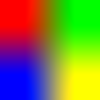

In [7]:
img.resize((100, 100))

The only thing I don't like about the above is the blurry transitions between the colors.  I would rather it just use 50-by-50 pixels of red, 50-by-50 pixels of green, and so on.  If we check the documentation for `img.resize`, we see that there is a `resample` keyword argument which can be used to influence these transitions.

In [8]:
help(img.resize)

Help on method resize in module PIL.Image:

resize(size, resample=None, box=None, reducing_gap=None) method of PIL.Image.Image instance
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:data:`PIL.Image.Resampling.NEAREST`,
       :py:data:`PIL.Image.Resampling.BOX`,
       :py:data:`PIL.Image.Resampling.BILINEAR`,
       :py:data:`PIL.Image.Resampling.HAMMING`,
       :py:data:`PIL.Image.Resampling.BICUBIC` or
       :py:data:`PIL.Image.Resampling.LANCZOS`.
       If the image has mode "1" or "P", it is always set to
       :py:data:`PIL.Image.Resampling.NEAREST`.
       If the image mode specifies a number of bits, such as "I;16", then the
       default filter is :py:data:`PIL.Image.Resampling.NEAREST`.
       Otherwise, the default filter is
       :py:data:`PIL.Image.Resampling.BICUBIC`. See: :ref:`concept-filters`.
   

In the above documentation, notice that the resampling options all have names like `PIL.Image.Resampling.LANCZOS`.  This means that for example `LANCZOS` is an attribute of `PIL.Image.Resampling`.  (We have already imported `Image` from `PIL`, so we would just call this `Image.Resampling` instead of `PIL.Image.Resampling`.)  We can view all of the attributes using Python's `dir` function.

It's hard to predict how many attributes there will be, but in this case, there are just the values we saw in the documentation, together with some so-called "dunder" methods (short for "double underscore", because the names have two underscores at the beginning and at the end).

In [9]:
dir(Image.Resampling)

['BICUBIC',
 'BILINEAR',
 'BOX',
 'HAMMING',
 'LANCZOS',
 'NEAREST',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

The output of `dir` is a list, and here we iterate through the elements in the list.

In [10]:
for s in dir(Image.Resampling):
    print(s)

BICUBIC
BILINEAR
BOX
HAMMING
LANCZOS
NEAREST
__class__
__doc__
__members__
__module__


Here we are only interested in the attributes that do not start with an underscore.

In [11]:
for s in dir(Image.Resampling):
    if s[0] != "_":
        print(s)

BICUBIC
BILINEAR
BOX
HAMMING
LANCZOS
NEAREST


It would be tempting to use notation like `resample=Image.Resampling.s`, but how would Python know that this `s` is a variable and not a string?  We want to use something like f-strings, but we don't have a string in this case, so f-strings will not work with this approach.

In [12]:
for s in dir(Image.Resampling):
    if s[0] != "_":
        print(s)
        display(img.resize((100, 100), resample=Image.Resampling.s))

BICUBIC


AttributeError: s

One option, that I think will always work, is to use Python's built-in `getattr` function (short for "get attribute").  Here we can see the effect of each of these resampling options.

BICUBIC


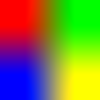

BILINEAR


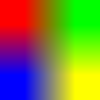

BOX


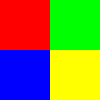

HAMMING


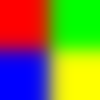

LANCZOS


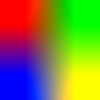

NEAREST


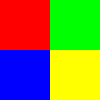

In [13]:
for s in dir(Image.Resampling):
    if s[0] != "_":
        print(s)
        display(img.resize((100, 100), resample=getattr(Image.Resampling, s)))

Another approach, that I think is more natural in this case, but which I think will not always work, is to use indexing notation, as in `resample=Image.Resampling[s]`.

BICUBIC


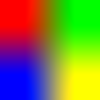

BILINEAR


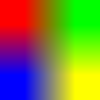

BOX


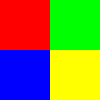

HAMMING


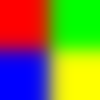

LANCZOS


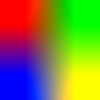

NEAREST


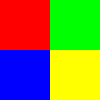

In [14]:
for s in dir(Image.Resampling):
    if s[0] != "_":
        print(s)
        display(img.resize((100, 100), resample=Image.Resampling[s]))

## Swapping two color channels

<iframe width="560" height="315" src="https://www.youtube.com/embed/pANMhOx_22M" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Here is our goal in this section:

* Swap the green and blue color channels of the penguins image.

In [1]:
from PIL import Image
import numpy as np

In [2]:
img = Image.open("penguins.jpg")
arr = np.asarray(img)

Here is a reminder of what `arr` contains.

In [3]:
arr

array([[[178, 190, 206],
        [178, 190, 206],
        [178, 190, 206],
        ...,
        [121, 137, 171],
        [121, 137, 171],
        [121, 137, 171]],

       [[179, 191, 207],
        [179, 191, 207],
        [179, 191, 207],
        ...,
        [120, 136, 170],
        [120, 136, 170],
        [119, 135, 169]],

       [[179, 191, 207],
        [179, 191, 207],
        [179, 191, 207],
        ...,
        [119, 135, 169],
        [118, 134, 168],
        [117, 133, 167]],

       ...,

       [[225, 226, 231],
        [224, 225, 230],
        [222, 223, 228],
        ...,
        [ 46,  46,  58],
        [ 64,  67,  82],
        [ 80,  85, 104]],

       [[222, 223, 228],
        [222, 223, 228],
        [218, 219, 224],
        ...,
        [ 54,  56,  69],
        [ 55,  58,  75],
        [108, 115, 134]],

       [[215, 218, 225],
        [209, 212, 219],
        [196, 199, 206],
        ...,
        [ 75,  77,  89],
        [100, 108, 121],
        [127, 139, 155]]

Let's just think about the upper-left pixel, and trying to swap its green and blue channels.  (For simplicity we will consider the list version of this length-3 NumPy array.)  Here is a common beginning programming mistake.

In [5]:
mylist = [178, 190, 206]
mylist[1] = mylist[2]
mylist[2] = mylist[1]

The problem of course is that `190`, corresponding to `mylist[1]`, gets lost when we execute the line `mylist[1] = mylist[2]`, and there is no way to recover it.  So we wind up with the number `206` repeated.

In [6]:
mylist

[178, 206, 206]

Here is what I think of as the standard solution to that error: we store `mylist[1]` in a temporary variable, so the value doesn't get lost when we execute the line `mylist[1] = mylist[2]`.

In [7]:
mylist = [178, 190, 206]
temp = mylist[1]
mylist[1] = mylist[2]
mylist[2] = temp

Here we can see that we did successfully swap the green and blue channels for this pixel.

In [8]:
mylist

[178, 206, 190]

Let's try to emulate that strategy for the entire NumPy array. If we want the green channel from every row and every column, we can use `arr[:,:,1]`.  We store those green values in a temporary variable, and use the same procedure as above.

The first mistake is trying to make assignments to `arr`.  The line `temp = arr[:,:,1]` is fine, but the next line `arr[:,:,1] = arr[:,:,2]` raises an error.  Because `arr` is read-only, we need to use its copy `B`.

In [9]:
B = arr.copy()
temp = arr[:,:,1]
arr[:,:,1] = arr[:,:,2]
arr[:,:,2] = temp

ValueError: assignment destination is read-only

We now replace `arr` with `B`, but there is a very subtle error.  It would be very difficult to predict this error in advance (it is related to how Python and/or NumPy handle variable assignments).

In [10]:
B = arr.copy()
temp = B[:,:,1]
B[:,:,1] = B[:,:,2]
B[:,:,2] = temp

If we look at the upper-left-most pixel, we see the exact same issue as we saw above in the list version, even though it seems like we already applied the fix.

In [11]:
B[0,0]

array([178, 206, 206], dtype=uint8)

As a hint of what's wrong, let's look at the size in memory of `temp`.

In [12]:
from sys import getsizeof

We see that `temp` is `128` bytes.

In [13]:
getsizeof(temp)

128

Here is the contents of `temp`.

In [14]:
temp

array([[206, 206, 206, ..., 171, 171, 171],
       [207, 207, 207, ..., 170, 170, 169],
       [207, 207, 207, ..., 169, 168, 167],
       ...,
       [231, 230, 228, ...,  58,  82, 104],
       [228, 228, 224, ...,  69,  75, 134],
       [225, 219, 206, ...,  89, 121, 155]], dtype=uint8)

And here is the `shape` of `temp`.  Does it really seem like a 225-by-399 array of integers can be stored in 128 bytes?

In [15]:
temp.shape

(225, 399)

The issue is that, when we evaluate `temp = B[:,:,1]`, the contents of `B[:,:,1]` do not get copied over to `temp`.  Instead, `temp` only remembers the location of where it should get its contents.  This can be convenient when working with very large NumPy arrays, but in this case, it breaks our code, because the assignment `B[:,:,1] = B[:,:,2]` not only changes `B[:,:,1]`, but also changes `temp`.

One flexible work-around is to call the `copy` method on `B[:,:,1]`, so that its contents get copied over to `temp`.

In [16]:
B = arr.copy()
temp = B[:,:,1].copy()
B[:,:,1] = B[:,:,2]
B[:,:,2] = temp

Notice how, in this case, `B[0,0]`, representing the upper-left-most pixel, really does have three different channel values.

In [17]:
B[0,0]

array([178, 206, 190], dtype=uint8)

I think the above solution is the most general and most enlightening.  In our very particular situation, there is probably a simpler solution, due to the fact that we already have a copy of all the values saved, in the NumPy array `arr`.

In [18]:
B = arr.copy()
B[:,:,1] = arr[:,:,2]
B[:,:,2] = arr[:,:,1]

Here we get the same upper-left-most pixel as in our `copy` solution.

In [19]:
B[0,0]

array([178, 206, 190], dtype=uint8)

To end this section, we will see how the image changes when its green and blue color channels are swapped.

Here is the original image.

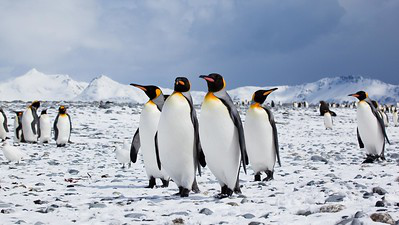

In [20]:
img

Here is the new image.  Notice how the blue colors have been replaced by green colors.  What other changes do you notice?

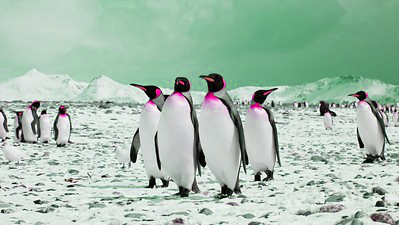

In [21]:
Image.fromarray(B)

## Unique colors

<iframe width="560" height="315" src="https://www.youtube.com/embed/FNCSlsu5coE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In this section, we will count the number of unique colors in an image.  As usual, the point is not the importance of the image processing technique.  Instead, the point is to practice with NumPy (in this case, the NumPy function `unique` together with an `axis` keyword argument).

In [1]:
from PIL import Image
import numpy as np

The penguins image we were working with above has thousands of colors.  Here we will work with a simpler image, that has just three colors.

In [2]:
img = Image.open("images/test_grid.png")
arr = np.asarray(img)

It looks like there are only three colors in this image, but sometimes there are many more colors than you would expect, especially at the boundary between colors.  In this case, we'll verify that there indeed exactly three colors.

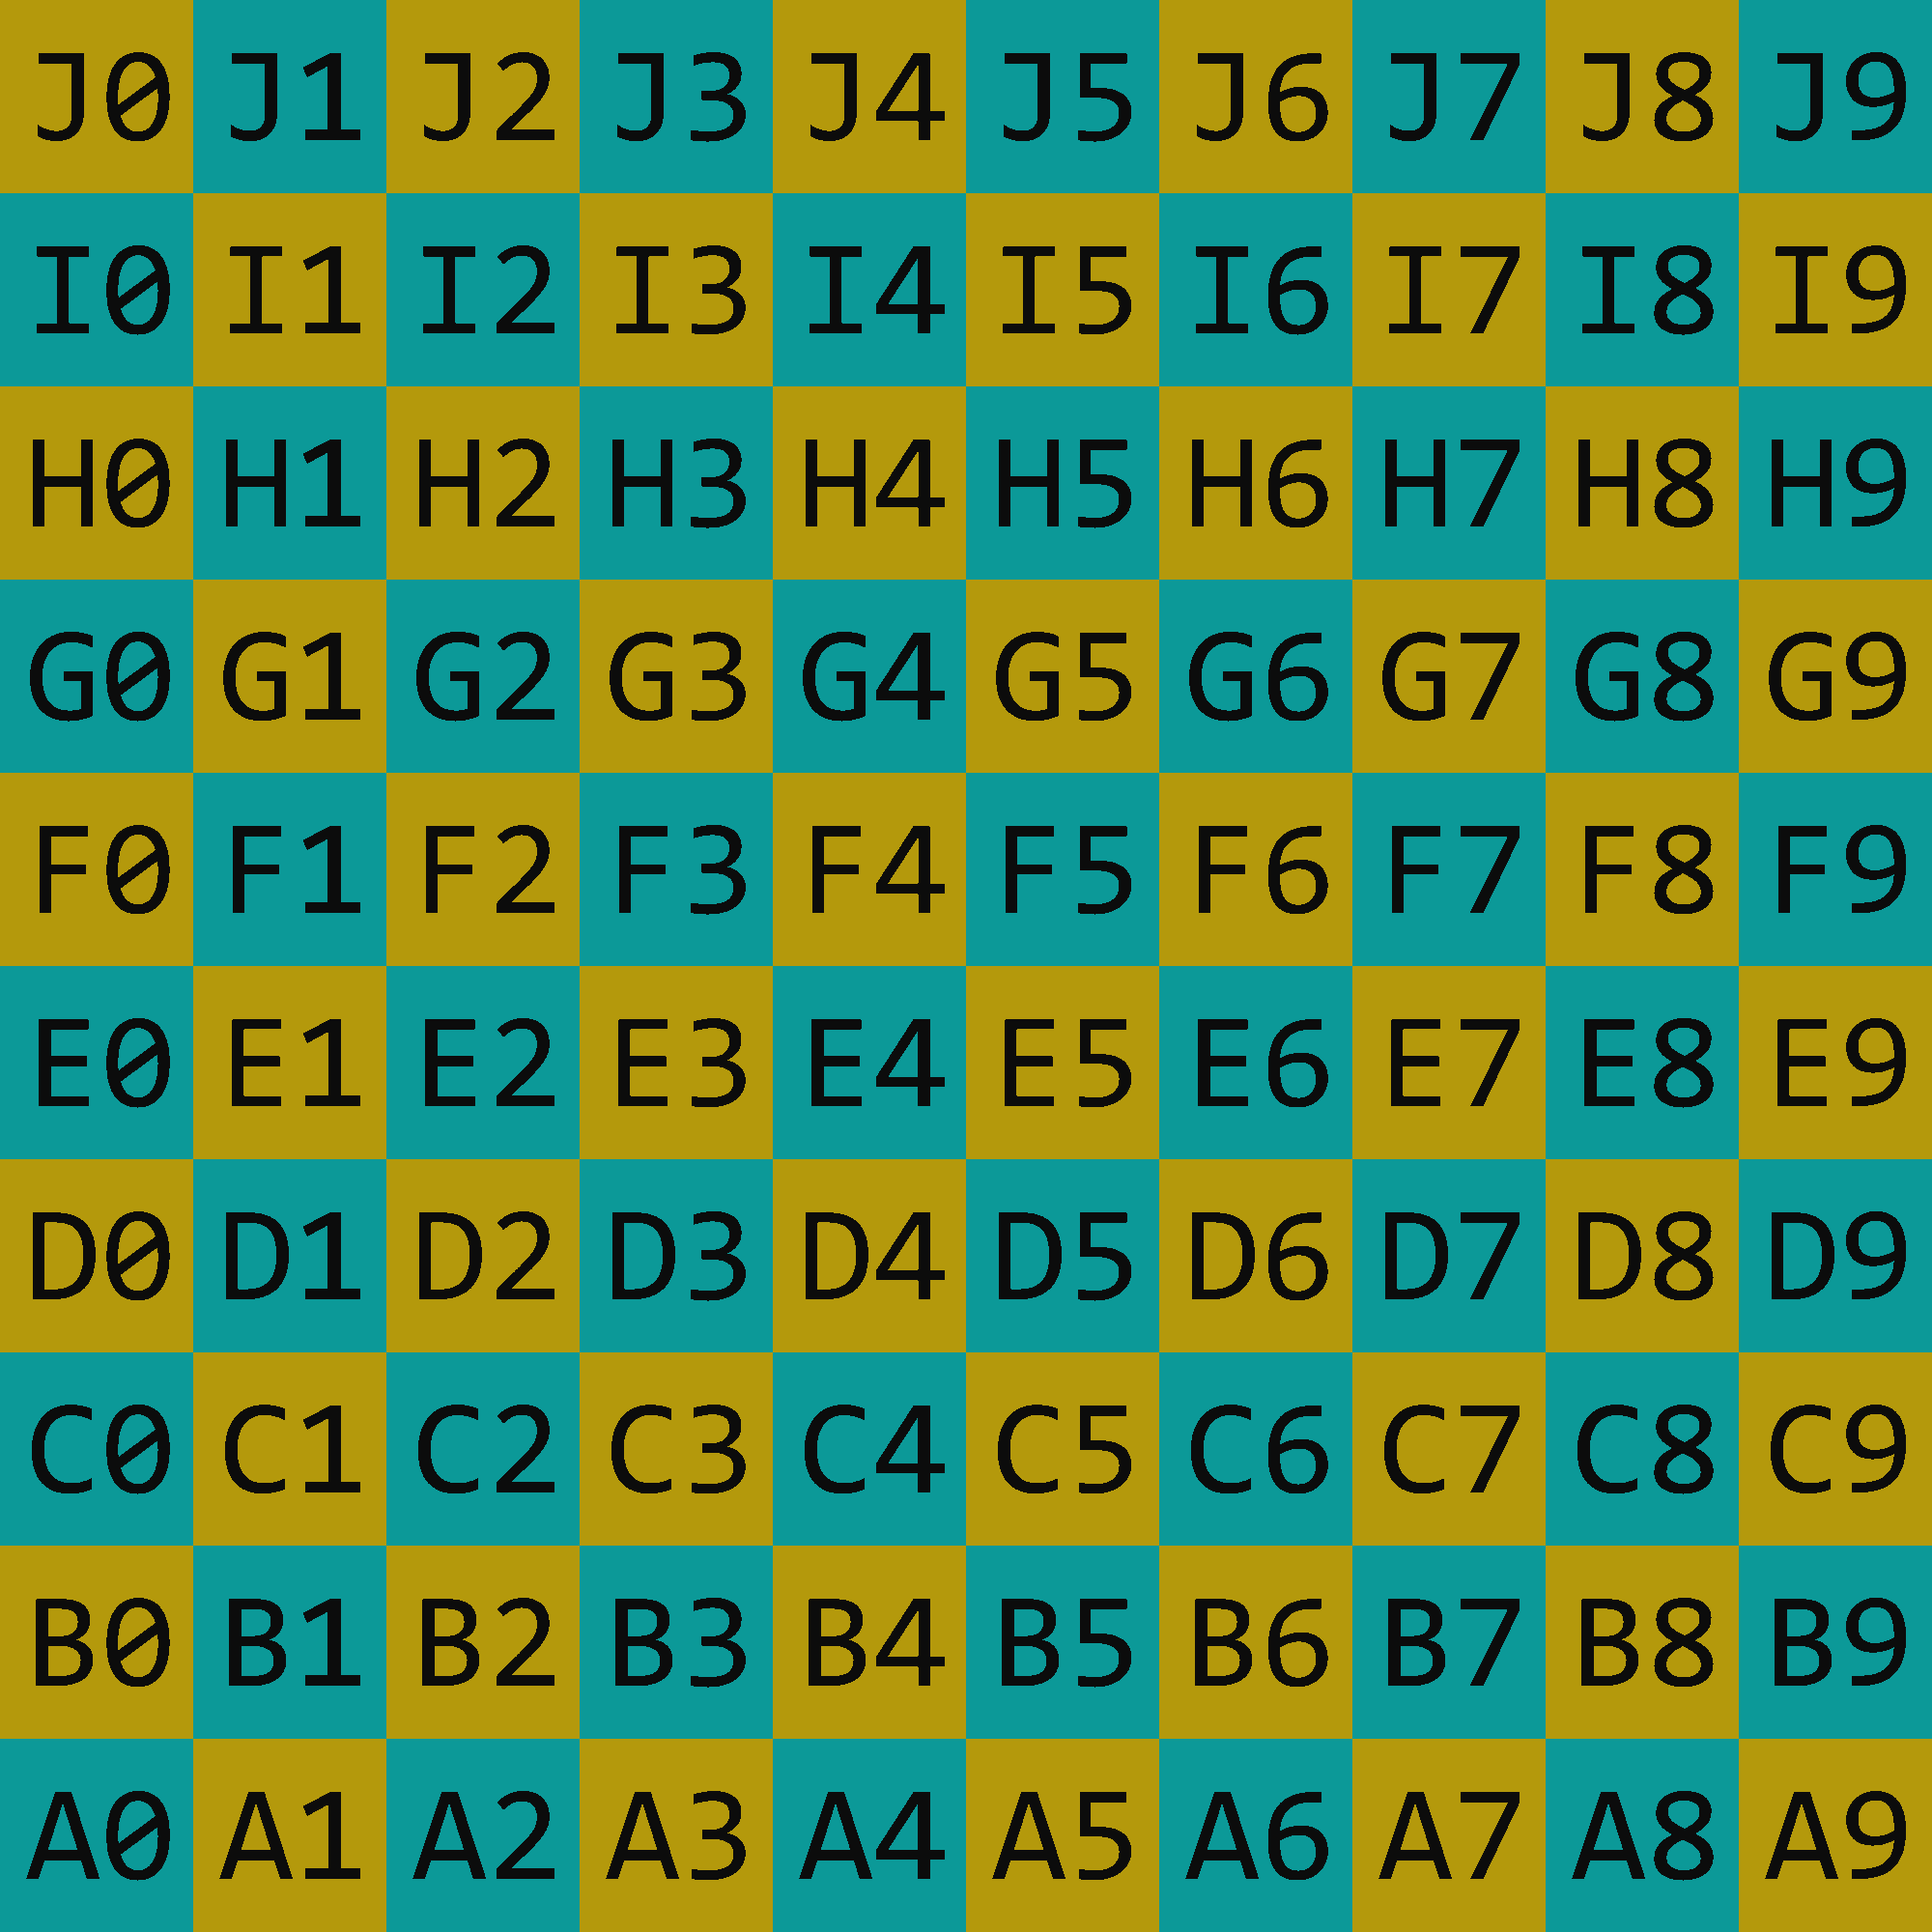

In [3]:
img

Even though this is a simpler image than the penguins photograph above, this grid is a significantly bigger image, in terms of pixels.

In [5]:
arr.shape

(2000, 2000, 3)

If we look at the corresponding NumPy array, we see that the very top row of pixels begins with three pixels with RGB values `[180, 153, 12]` and ends with three pixels with RGB values `[12, 153, 152]`.

In [4]:
arr

array([[[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       [[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       [[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       ...,

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]],

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]],

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]]

The function we want to use is `np.unique`, but if we call that function directly on `arr`, we will learn how many unique numbers appear in `arr`, whereas we want to know how many unique RGB triples of numbers occur.

In [6]:
np.unique(arr)

array([ 12, 152, 153, 180], dtype=uint8)

The first step to applying `np.unique` successfully in this context is to reshape the array so it is two-dimensional, and with each row corresponding to a single RGB value that occurs in the image.

In [7]:
B = arr.reshape(-1,3)

For example, at the top of `B`, we see the same RGB values that we noticed in the original three-dimensional NumPy array.

In [8]:
B

array([[180, 153,  12],
       [180, 153,  12],
       [180, 153,  12],
       ...,
       [180, 153,  12],
       [180, 153,  12],
       [180, 153,  12]], dtype=uint8)

Recall that `arr` was size $2000 \times 2000 \times 3$.  After reshaping, `B` has size $4000000 \times 3$.  (One way to think about it is, we don't care about what rows and columns the pixels are in; all we care about are what are the different colors of pixels that occur.)

In [9]:
B.shape

(4000000, 3)

If we call `np.unique(B)`, we get the exact same result as `np.unique(arr)`.  If we don't specify an `axis` keyword argument to `np.unique`, then the shape of the input array does not matter.

In [10]:
np.unique(B)

array([ 12, 152, 153, 180], dtype=uint8)

The key is to call the `unique` function with `axis=0`.  This is saying, compare all of the rows to each other, and keep one copy of each unique row.  (How I think about it, is that we are changing the 0-axis, the rows axis.)  In this case, we are going from 4 million rows to 3 rows (corresponding to 3 colors).  We can see that the 0-dimension is changing, because `B.shape[0]` is `4000000` while `C.shape[0]` is `3`, whereas `B.shape[1]` and `C.shape[1]` are both `3`, so the 1-dimension or the columns dimension is not changing.

In [11]:
C = np.unique(B, axis=0)

In [12]:
C.shape

(3, 3)

From `C` we can confirm our suspicion that there were exactly three colors in our grid image.  We had already seen two of these RGB triples, and the last one reported, `[12, 12, 12]`, is very close to black, `[0, 0, 0]`, so that is the dark color that is used for writing the letters and numbers.

In [13]:
C

array([[ 12,  12,  12],
       [ 12, 153, 152],
       [180, 153,  12]], dtype=uint8)

We can tell that the colors change between `[12, 153, 152]` and `[180, 153, 12]` at very regular intervals.  For the rest of this section, our goal is to determine where these changes occur.

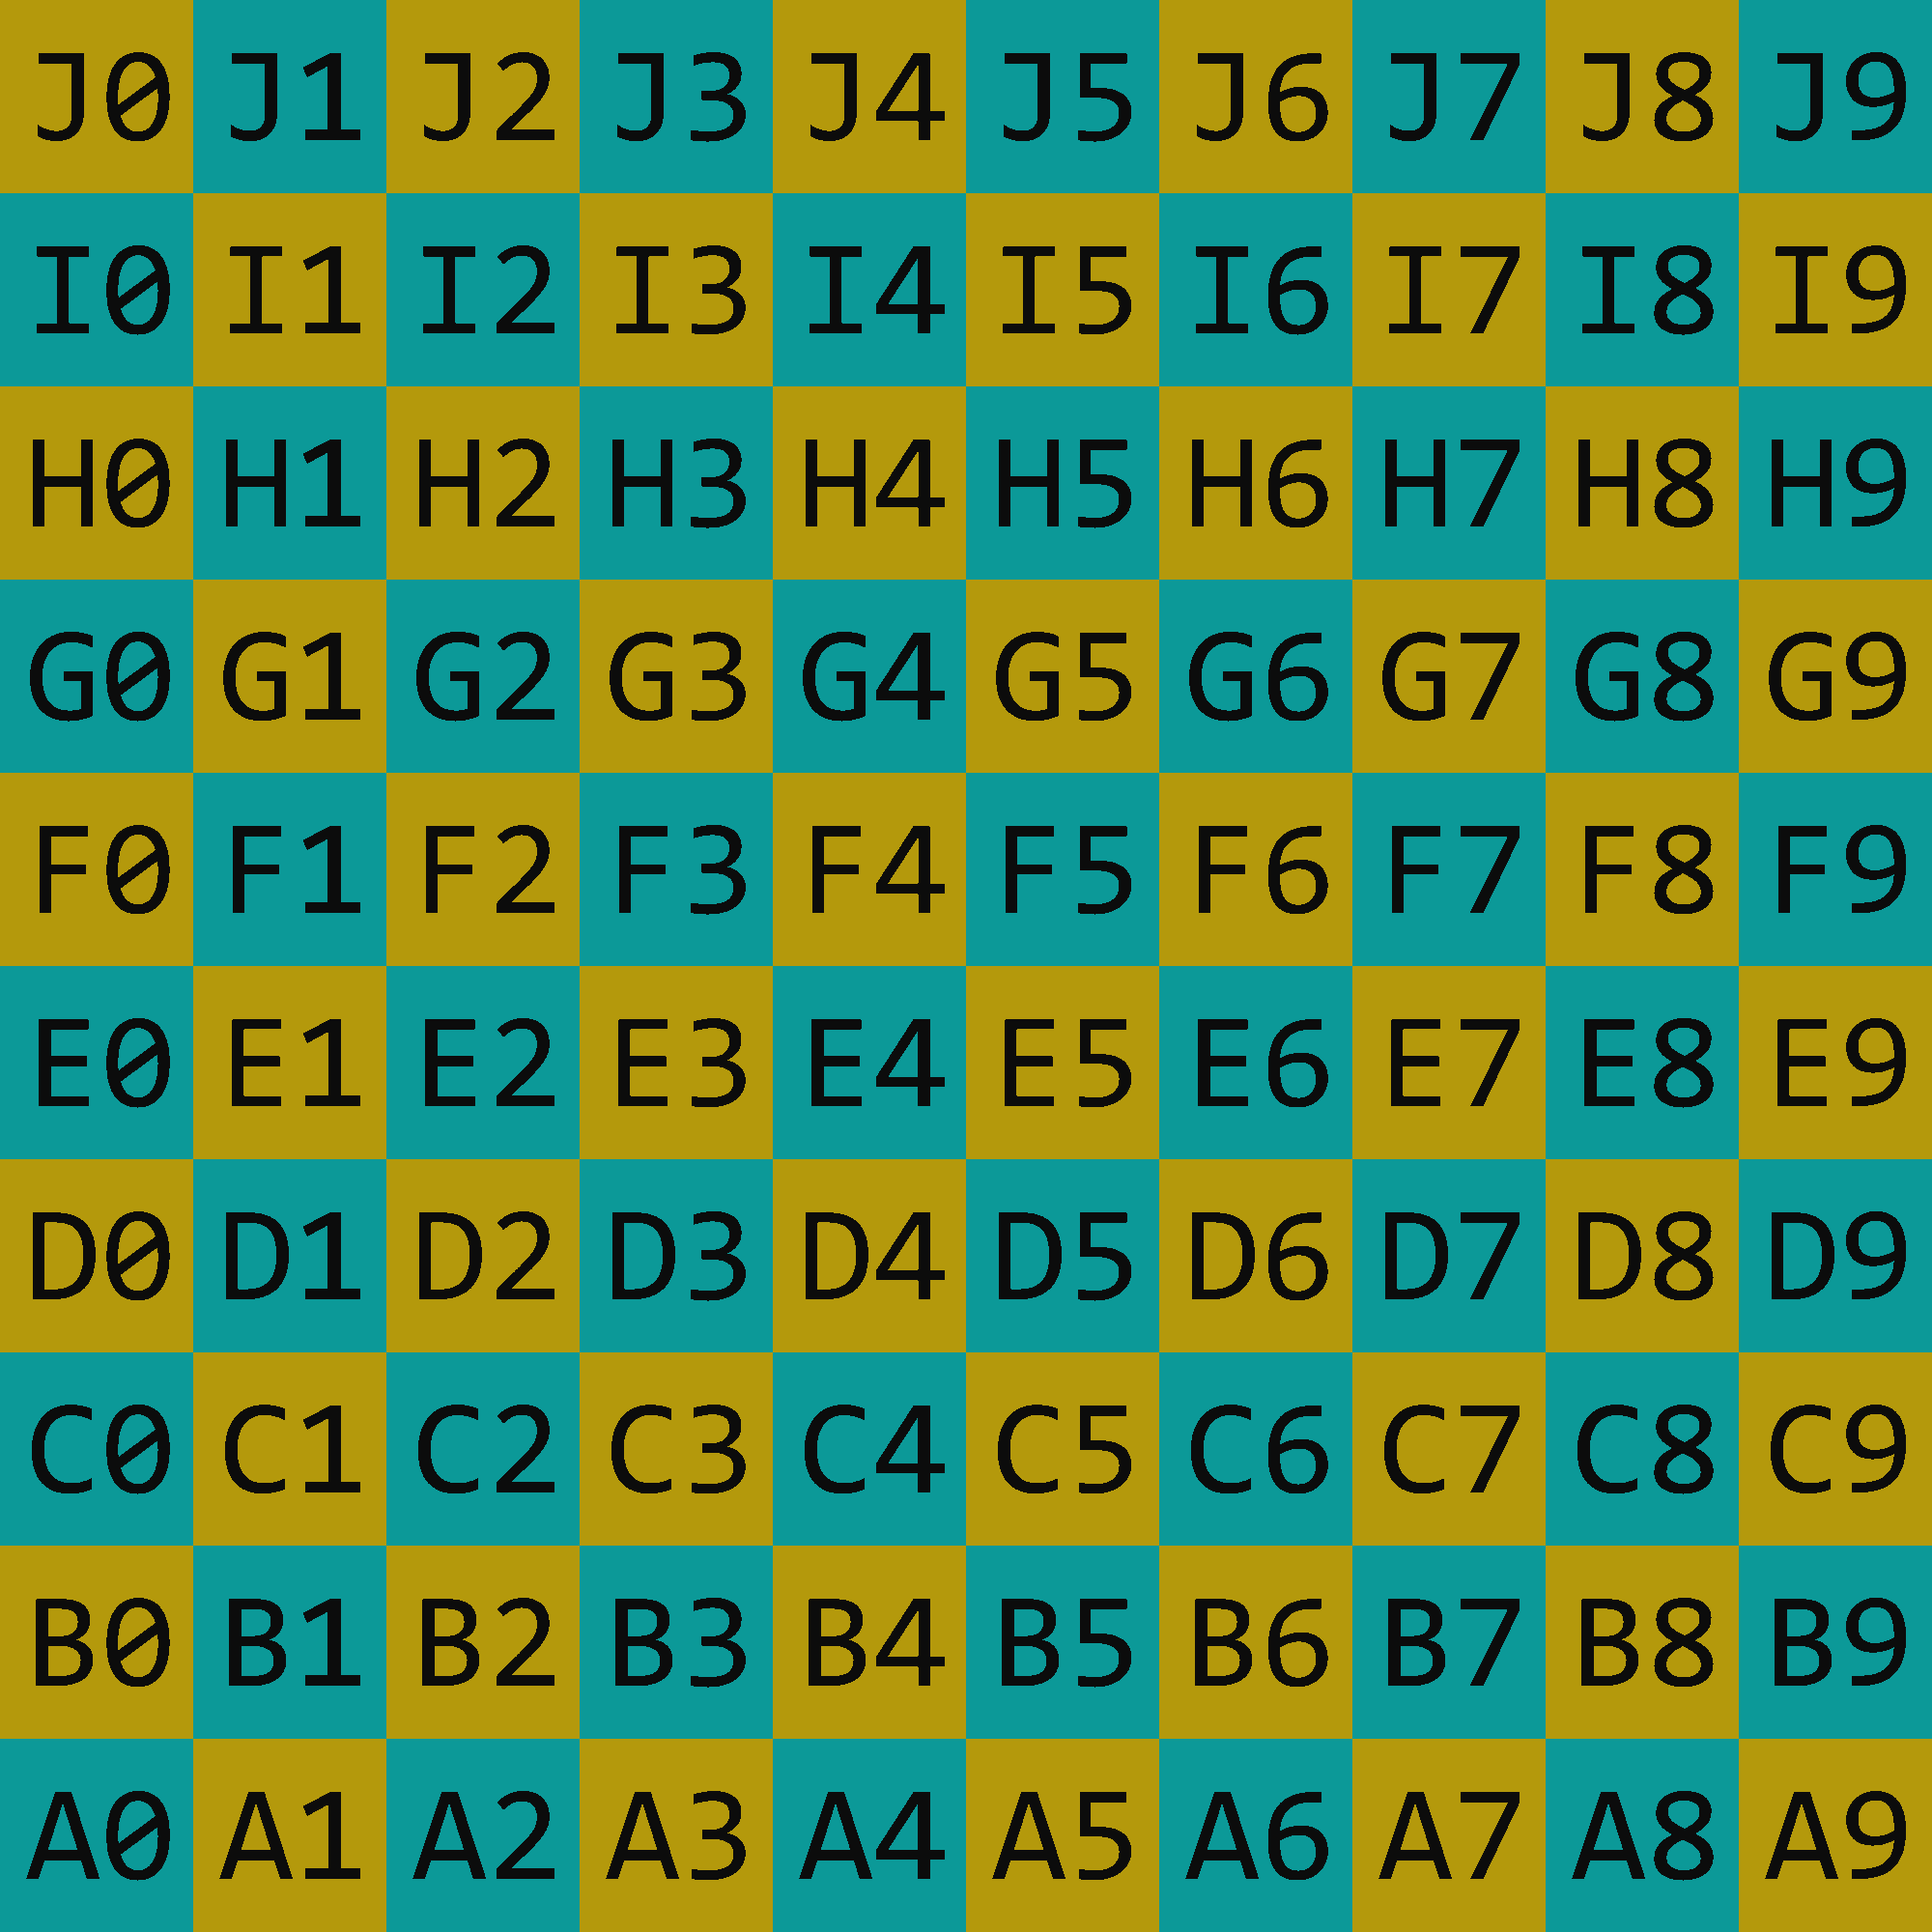

In [14]:
img

It suffices to just look at the very top-most row.  If we know where the colors change in the top row, we will also know where they change in every row.

In [15]:
arr[0]

array([[180, 153,  12],
       [180, 153,  12],
       [180, 153,  12],
       ...,
       [ 12, 153, 152],
       [ 12, 153, 152],
       [ 12, 153, 152]], dtype=uint8)

The shape of the top row is $2000 \times 3$, which represents 2000 pixels.

In [16]:
arr[0].shape

(2000, 3)

A first guess for how to check the colors is to evaluate the following, but the `==` is getting broadcast.  For example, here we intended that `[180, 153, 12] == [12, 153, 152]` would evaluate to `False`, since the triples are not equal, but because of broadcasting, this is evaluating to `[False, True, False]`.

In [17]:
arr[0] == [ 12, 153, 152]

array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

The trick is to then apply `all(axis=1)`.  For example, this will convert `[False, True, False]` to `False` and this will convert `[True, True, True]` to `True`.  (You might have expected us to use `axis=2`, because the RGB channels usually live in the third-dimension, but remember that we are only looking at the top row of pixels, so we have cut down the dimension by one.)

In [18]:
(arr[0] == [ 12, 153, 152]).all(axis=1)

array([False, False, False, ...,  True,  True,  True])

As a sign that this is working correctly, if we check the `shape` of this Boolean array, we get that it is a one-dimensional NumPy array of length 2000.  This is as we expected, because it represents the 2000 pixels in the top row of the image.

In [19]:
(arr[0] == [ 12, 153, 152]).all(axis=1).shape

(2000,)

Let's save this length-2000 Boolean array as `BM`, for "Boolean Mask".

In [21]:
BM = (arr[0] == [ 12, 153, 152]).all(axis=1)

Where does `BM` switch from `False` to `True`?  As a first step, let's just check where it is `True`.  We can find those indices by using `np.nonzero`.  Recall that `np.nonzero` returns a tuple.

In [22]:
np.nonzero(BM)

(array([ 200,  201,  202,  203,  204,  205,  206,  207,  208,  209,  210,
         211,  212,  213,  214,  215,  216,  217,  218,  219,  220,  221,
         222,  223,  224,  225,  226,  227,  228,  229,  230,  231,  232,
         233,  234,  235,  236,  237,  238,  239,  240,  241,  242,  243,
         244,  245,  246,  247,  248,  249,  250,  251,  252,  253,  254,
         255,  256,  257,  258,  259,  260,  261,  262,  263,  264,  265,
         266,  267,  268,  269,  270,  271,  272,  273,  274,  275,  276,
         277,  278,  279,  280,  281,  282,  283,  284,  285,  286,  287,
         288,  289,  290,  291,  292,  293,  294,  295,  296,  297,  298,
         299,  300,  301,  302,  303,  304,  305,  306,  307,  308,  309,
         310,  311,  312,  313,  314,  315,  316,  317,  318,  319,  320,
         321,  322,  323,  324,  325,  326,  327,  328,  329,  330,  331,
         332,  333,  334,  335,  336,  337,  338,  339,  340,  341,  342,
         343,  344,  345,  346,  347, 

We are not so interested in this tuple of length one; instead we are interested in the NumPy array it holds.  That NumPy array contains the indices where `BM` is `True`.

In [23]:
np.nonzero(BM)[0]

array([ 200,  201,  202,  203,  204,  205,  206,  207,  208,  209,  210,
        211,  212,  213,  214,  215,  216,  217,  218,  219,  220,  221,
        222,  223,  224,  225,  226,  227,  228,  229,  230,  231,  232,
        233,  234,  235,  236,  237,  238,  239,  240,  241,  242,  243,
        244,  245,  246,  247,  248,  249,  250,  251,  252,  253,  254,
        255,  256,  257,  258,  259,  260,  261,  262,  263,  264,  265,
        266,  267,  268,  269,  270,  271,  272,  273,  274,  275,  276,
        277,  278,  279,  280,  281,  282,  283,  284,  285,  286,  287,
        288,  289,  290,  291,  292,  293,  294,  295,  296,  297,  298,
        299,  300,  301,  302,  303,  304,  305,  306,  307,  308,  309,
        310,  311,  312,  313,  314,  315,  316,  317,  318,  319,  320,
        321,  322,  323,  324,  325,  326,  327,  328,  329,  330,  331,
        332,  333,  334,  335,  336,  337,  338,  339,  340,  341,  342,
        343,  344,  345,  346,  347,  348,  349,  3

Let's save that NumPy array with the variable name `inds`, for "indices".

In [24]:
inds = np.nonzero(BM)[0]

It's worth thinking slowly about why the following works.  We want to know all the indices `x` in `inds` such that `x-1` is not in `inds`, because that means that at index `x`, we switched between colors.  Here is how we can get those indices using list comprehension.  If you look through the previous array of indices, you'll notice that `600` is in the array, but `599` is not in the array, so the pixels at index `599` and `600` have different colors.

In [26]:
[x for x in inds if x-1 not in inds]

[200, 600, 1000, 1400, 1800]

If you look at `img` with the knowledge that it is total width 2000 pixels, so each square might be width 200, it makes sense that the colors switch from the yellow-ish color to the green-ish color at positions 200, 600, 1000, 1400, 1800.  The above list of numbers confirms this guess.

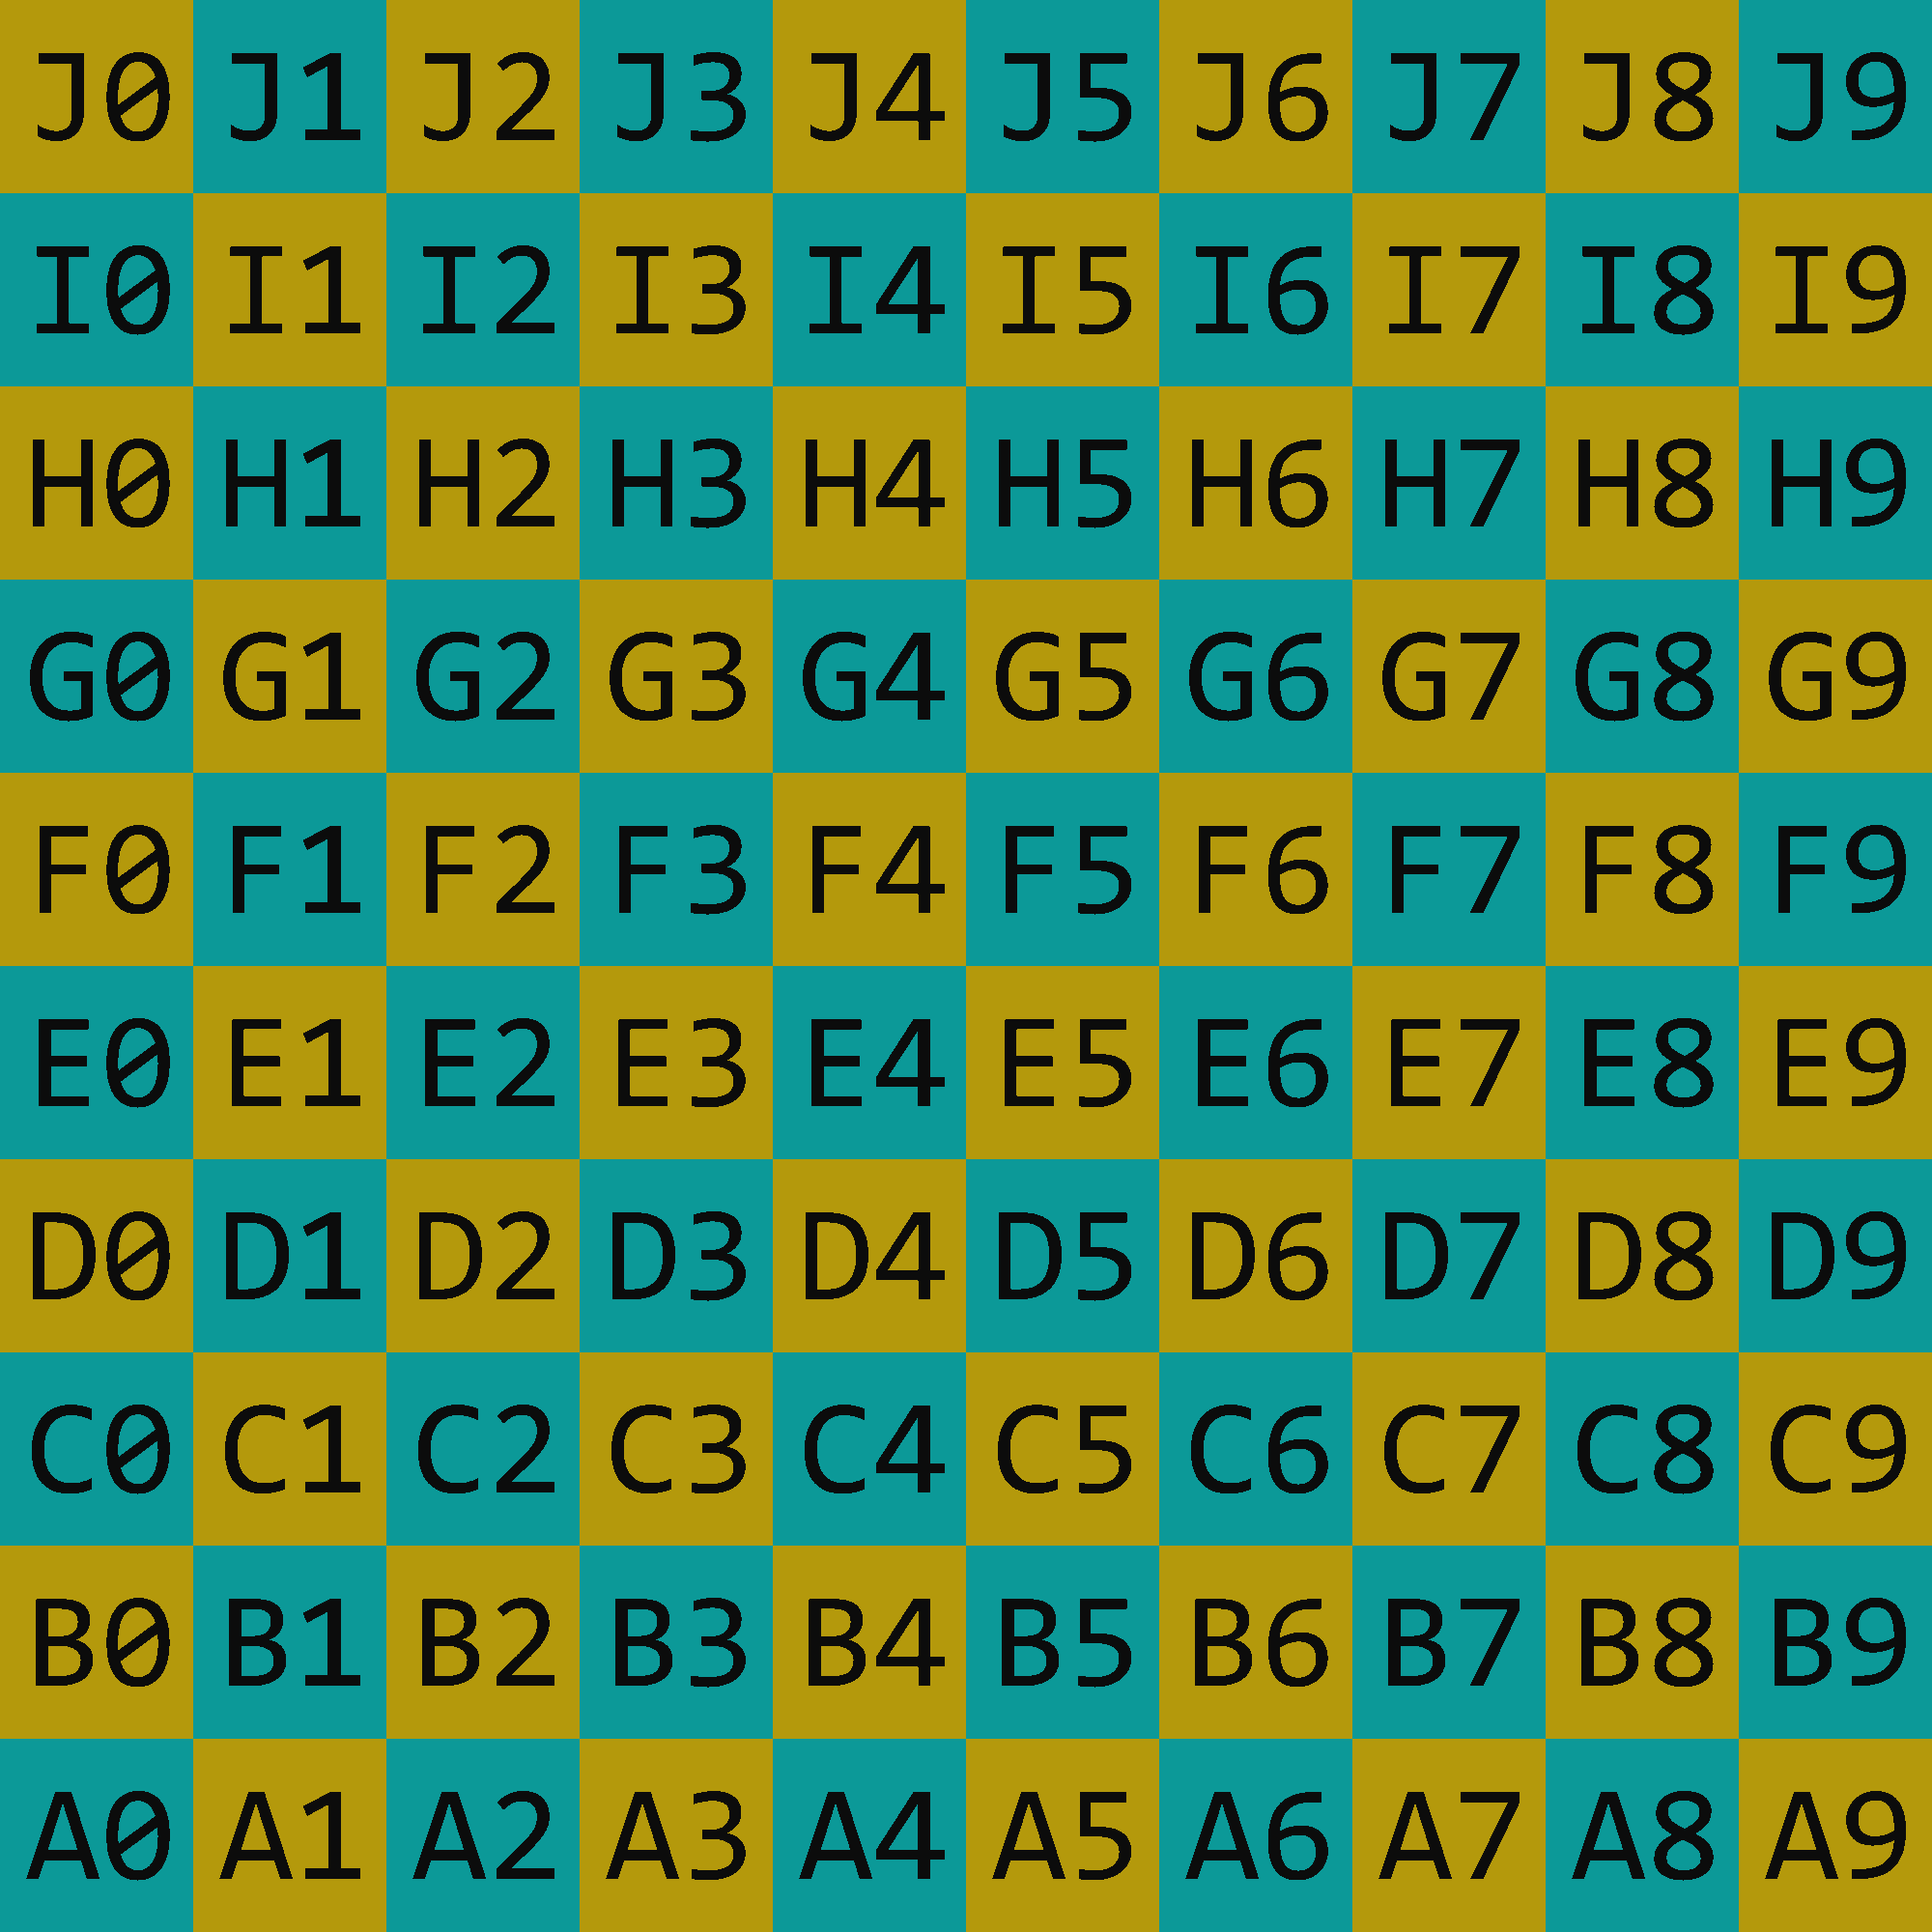

In [28]:
img

## Changing colors using a Boolean mask

<iframe width="560" height="315" src="https://www.youtube.com/embed/gFxxUQ311K8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Changing triples of values in a NumPy array is significantly harder than changing individual values.  Here is our goal in this section. 

* Replace all [12, 12, 12] RGB triples with [0, 255, 255] using a Boolean mask.

In [1]:
from PIL import Image
import numpy as np

We will use the same grid as in the previous section.

In [2]:
img = Image.open("images/test_grid.png")
arr = np.asarray(img)

To motivate our approach, we are going to start with a smaller example.

In [3]:
A = np.array([9,2,4,5,1,1,1,0,2,10,5,8])

Recall how *Boolean masking* (which I also call *Boolean indexing*) works.  For example, if we want to get exactly the values of `A` which are strictly greater than `5`, we can first form the following Boolean array.

In [4]:
A > 5

array([ True, False, False, False, False, False, False, False, False,
        True, False,  True])

And then we can "apply this Boolean mask" by evaluating `A[A > 5]`.  This will keep those values of `A` which are in slots containing `True` in our Boolean mask.

In [5]:
A[A > 5]

array([ 9, 10,  8])

If we instead want to keep pairs satisfying a certain condition, the situation is a little more complicated.

I don't like the way `B` is displayed by NumPy.  It would be better to think of it as a 2-row by 3-column matrix, each entry of which is a pair of numbers.  (In our actual example, the "pair of numbers" portion will be replaced by an RGB triple.)

Here is how I would visualize `B`:

$$
\begin{pmatrix}
[9,2] & [4,5] & [1,1] \\
[1,0] & [2,10] & [5,8]
\end{pmatrix}
$$

In [6]:
B = A.reshape((2,3,2))
B

array([[[ 9,  2],
        [ 4,  5],
        [ 1,  1]],

       [[ 1,  0],
        [ 2, 10],
        [ 5,  8]]])

Say we want to find all the pairs of numbers whose sum is strictly greater than 5.  If we just call `B.sum()`, that adds together all the numbers in `B`, which isn't what we want.

In [7]:
B.sum()

48

As usual, we can include an `axis` keyword argument.  In this case, we want to add up the last axis, `axis=2`.

In [8]:
B.sum(axis=2)

array([[11,  9,  2],
       [ 1, 12, 13]])

From here we can create a Boolean array just like before.

In [9]:
B.sum(axis=2) > 5

array([[ True,  True, False],
       [False,  True,  True]])

But what should be the result of indexing using this Boolean mask?  It turns out that the 2-by-3 shape of `B` is completely lost, and the pairs satisfying the condition are listed as rows, one on top of the other.  (This surprised me at first, but if you think about it, what better convention can you come up with?  Keeping the shape the same and leaving the `False` slots blank would not be an allowable NumPy array.)

Anyway, here is the result of applying this Boolean mask.  Be sure you understand how it relates to `B`.

In [10]:
B[B.sum(axis=2) > 5]

array([[ 9,  2],
       [ 4,  5],
       [ 2, 10],
       [ 5,  8]])

If we want to change the elements satisfying this condition, as opposed to displaying the elements, then the shape can be retained.  (The old values are left unchanged in the `False` slots.)  For example, here we replace all the pairs which have sum strictly greater than `5` with the pair `[-4,-5]`.

In [11]:
B[B.sum(axis=2) > 5] = [-4,-5]

The shape is a little concealed by the way NumPy displays it.  Here is a clearer visualization of the shape:

$$
\begin{pmatrix}
[-4,-5] & [-4,-5] & [1,1] \\
[1,0] & [-4,-5] & [-4,-5]
\end{pmatrix}
$$

In [12]:
B

array([[[-4, -5],
        [-4, -5],
        [ 1,  1]],

       [[ 1,  0],
        [-4, -5],
        [-4, -5]]])

Once the above example makes perfect sense, our image processing example will be much easier to follow.  Recall our goal:

* Replace all [12, 12, 12] RGB triples with [0, 255, 255] using a Boolean mask.

In the following print-out, we can't see any `[12, 12, 12]` triples, so none of the following displayed pixels should be changed.

In [13]:
arr

array([[[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       [[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       [[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       ...,

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]],

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]],

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]]

We create a two-dimensional Boolean mask using `all(axis=2)`, similar to the previous section.  Again, all of the displayed values are `False`, so none of the displayed pixels should be changed.

In [14]:
(arr == [12, 12, 12]).all(axis=2)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

If we use Boolean indexing, we get the triples which satisfy the condition listed one on top of each other, just like above when we used Boolean indexing with `B`.

In [16]:
arr[(arr == [12, 12, 12]).all(axis=2)]

array([[12, 12, 12],
       [12, 12, 12],
       [12, 12, 12],
       ...,
       [12, 12, 12],
       [12, 12, 12],
       [12, 12, 12]], dtype=uint8)

How many pixels have RGB values `[12, 12, 12]`?  A lot, nearly 500,000.

In [15]:
arr[(arr == [12, 12, 12]).all(axis=2)].shape

(467679, 3)

Our usual "read-only" error shows up in this context, but our NumPy strategy itself is correct.

In [17]:
arr[(arr == [12, 12, 12]).all(axis=2)] = [0, 255, 255]

ValueError: assignment destination is read-only

As usual, we create a NumPy array which is not read-only by using the `copy` method.

In [18]:
C = arr.copy()

In [19]:
C[(C == [12, 12, 12]).all(axis=2)] = [0, 255, 255]

The fun thing about using image processing as our example is that we can display the results at the end in a visual manner.  Here is the result of replacing all of the `[12, 12, 12]` pixels, which are close to black, with `[0, 255, 255]` pixels.

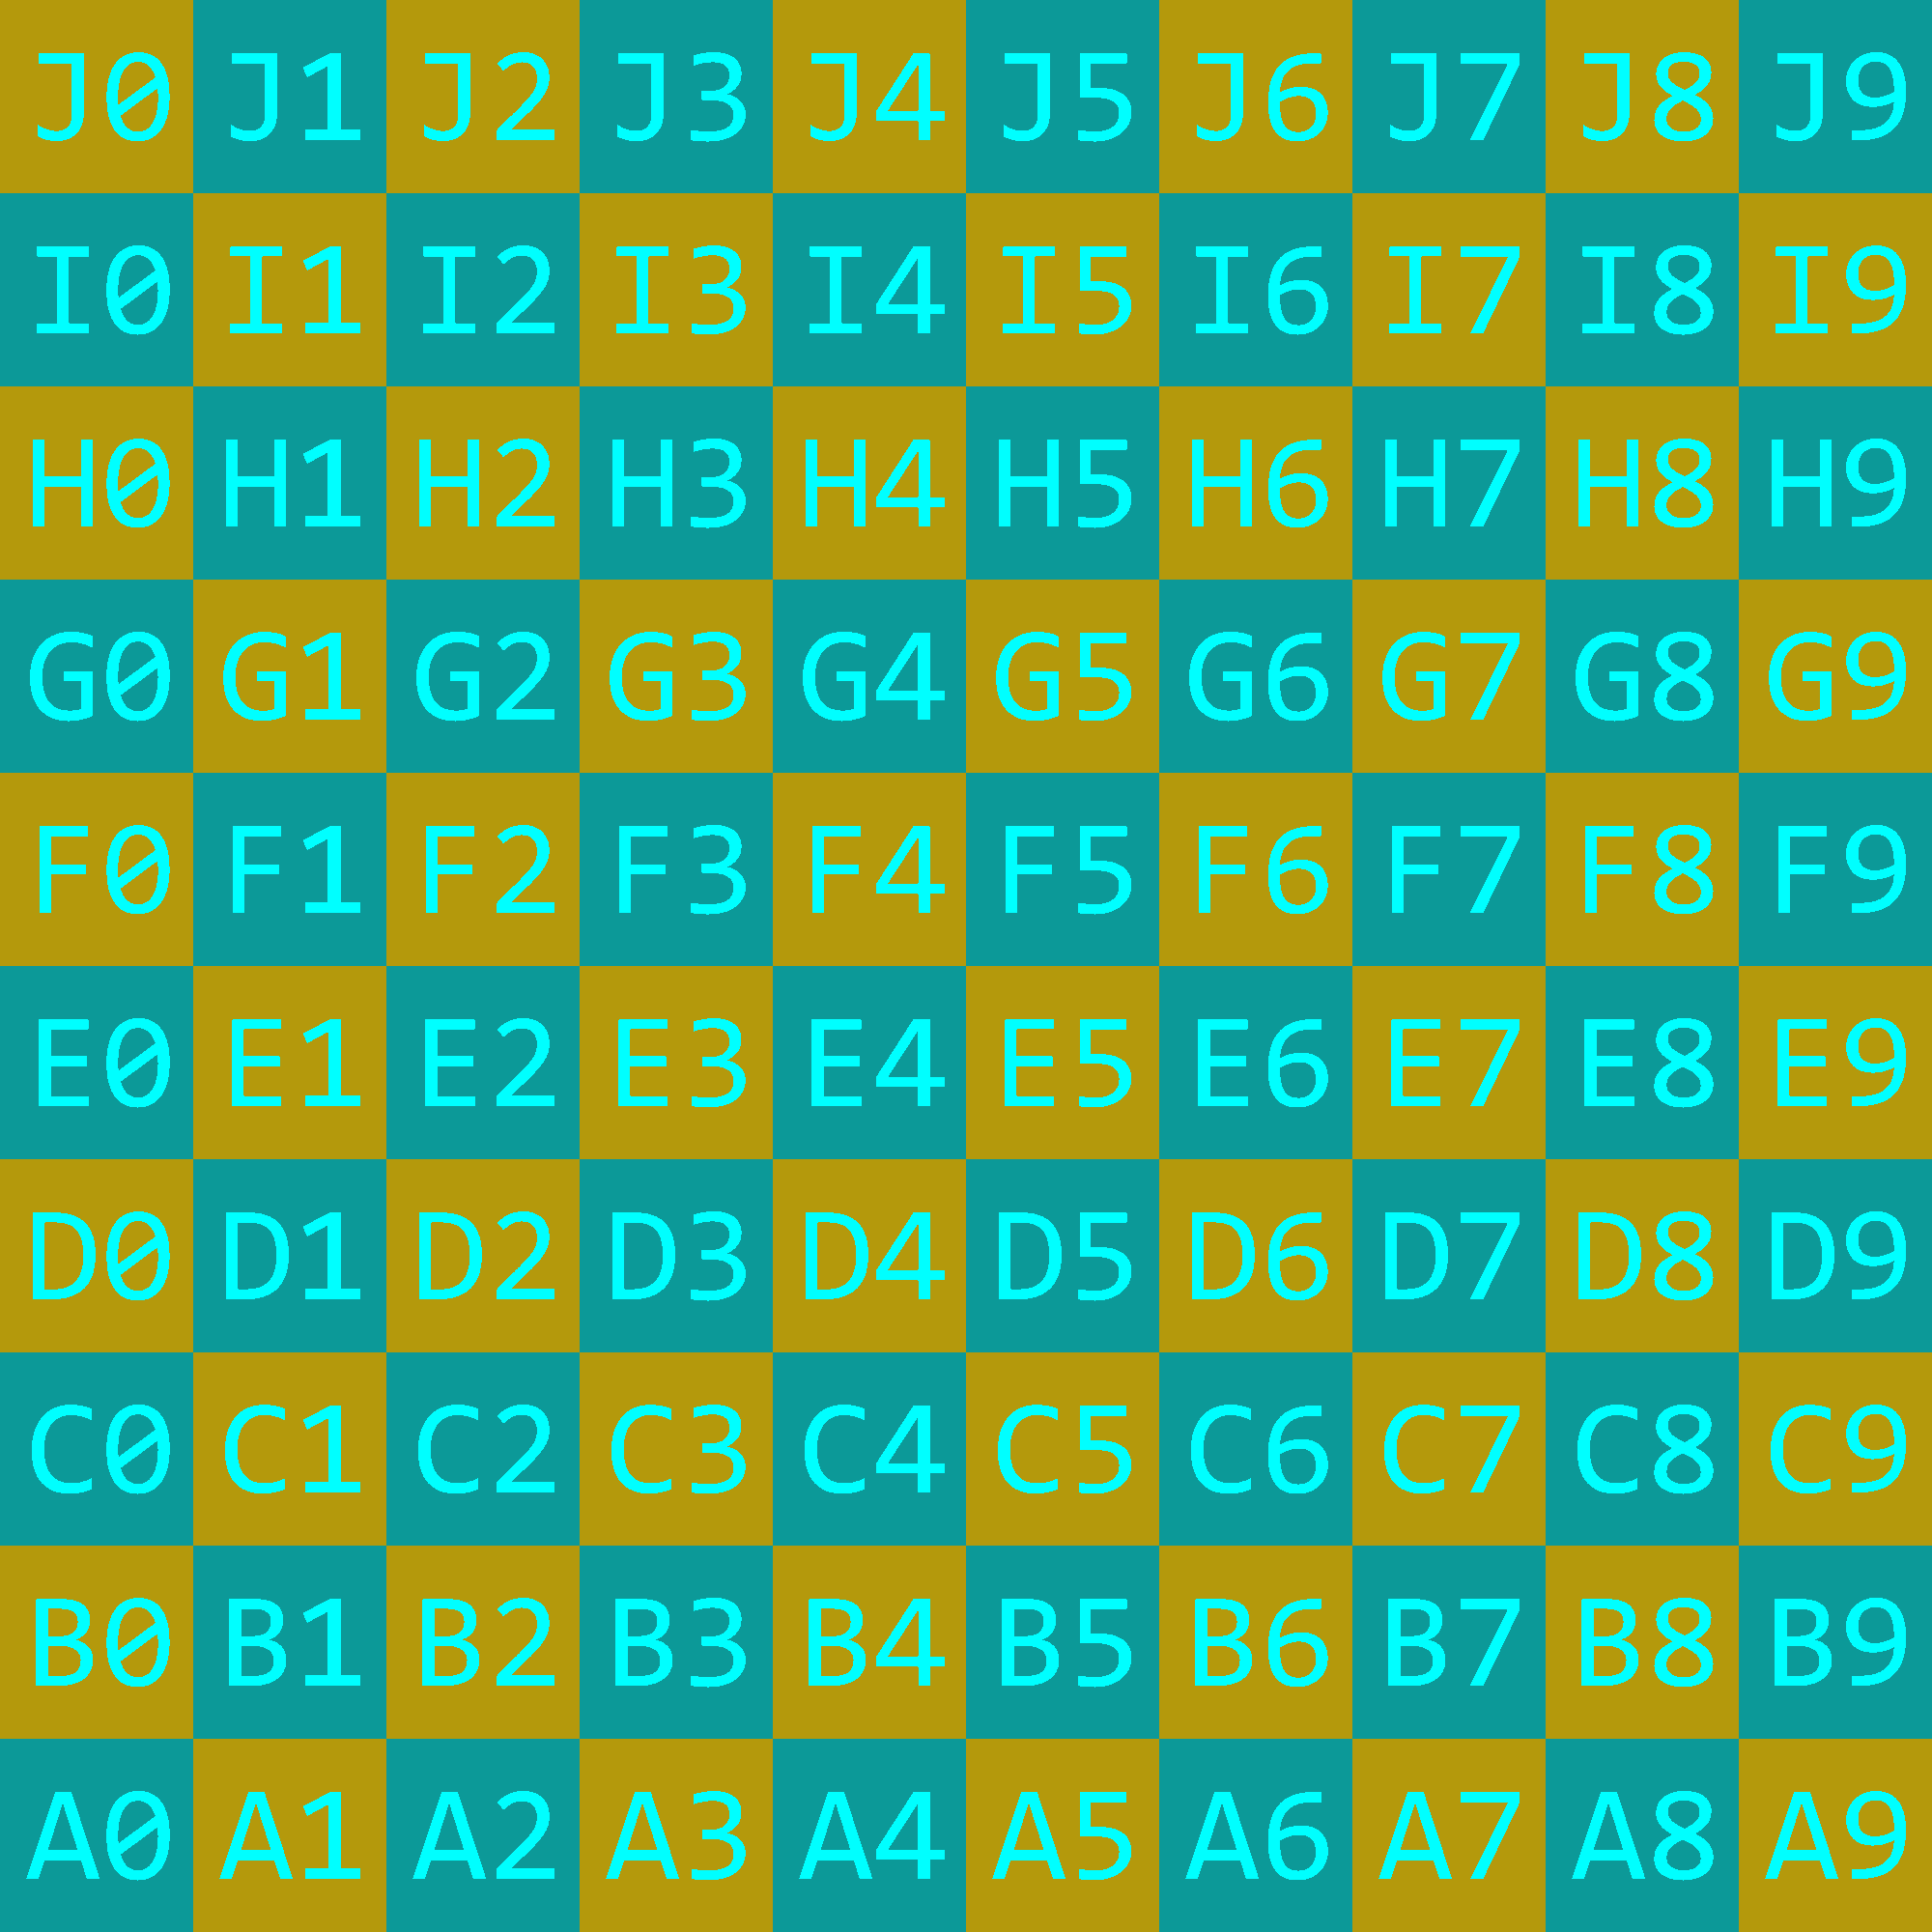

In [20]:
Image.fromarray(C)

## Changing colors using `np.where`

<iframe width="560" height="315" src="https://www.youtube.com/embed/3xf0YzJmnQE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In the previous section, we replaced the black text with a single blue-ish color.  Here we are going to replace the square backgrounds with different random colors.  In the previous section, we used Boolean indexing (which I also call a Boolean mask).  I don't know how to accomplish the goal of this section using Boolean indexing; in this section we will use `np.where`.

Here is the overall goal for this section.

* Replace the square backgrounds with random colors.

In [1]:
from PIL import Image
import numpy as np

In [2]:
img = Image.open("images/test_grid.png")
arr = np.asarray(img)

We are going to use the function `np.where` to replace the square background colors.  This function is a little complicated, but it is also very powerful.  Let's start out with seeing a basic application of this function, applied on a one-dimensional NumPy array.

In [3]:
A = np.array([9,2,4,5,1,1,1,0,2,10,5,8])

Consider the following example.  The first argument to `np.where` is a Boolean array, and the next two arguments are numbers, `-20` and `3`.  What this does is replace each `True` in the Boolean array with `-20` and replace each `False` in the Boolean array with `3`.

In [4]:
np.where(A > 5, -20, 3)

array([-20,   3,   3,   3,   3,   3,   3,   3,   3, -20,   3, -20])

That seems easy enough; here is a more sophisticated example.  Instead of passing `-20` as our `True` replacement, we pass the entire array `A`.  Notice that `A > 5` and `A` have the same shape.  In this case, the values of `True` get replaced by the corresponding value in `A`.

In [5]:
np.where(A > 5, A, 3)

array([ 9,  3,  3,  3,  3,  3,  3,  3,  3, 10,  3,  8])

There was nothing special about using `A` itself in the previous example.  Any array of that shape would have worked exactly the same.  For example, here we use `100*A`, and so the initial `True` gets replaced by $900 = 100 \cdot 9$.

In [6]:
np.where(A > 5, 100*A, 3)

array([ 900,    3,    3,    3,    3,    3,    3,    3,    3, 1000,    3,
        800])

We can also replace the `False` replacement with an array.  Here we use an `np.arange`.  Notice how we ensure it has the same length as `A`.

In [7]:
np.where(A > 5, 100*A, np.arange(len(A)))

array([ 900,    1,    2,    3,    4,    5,    6,    7,    8, 1000,   10,
        800])

That is most (but not all) of the information we need about `np.where` to replace the square background images.  Let's remind ourselves what the original image looks like.

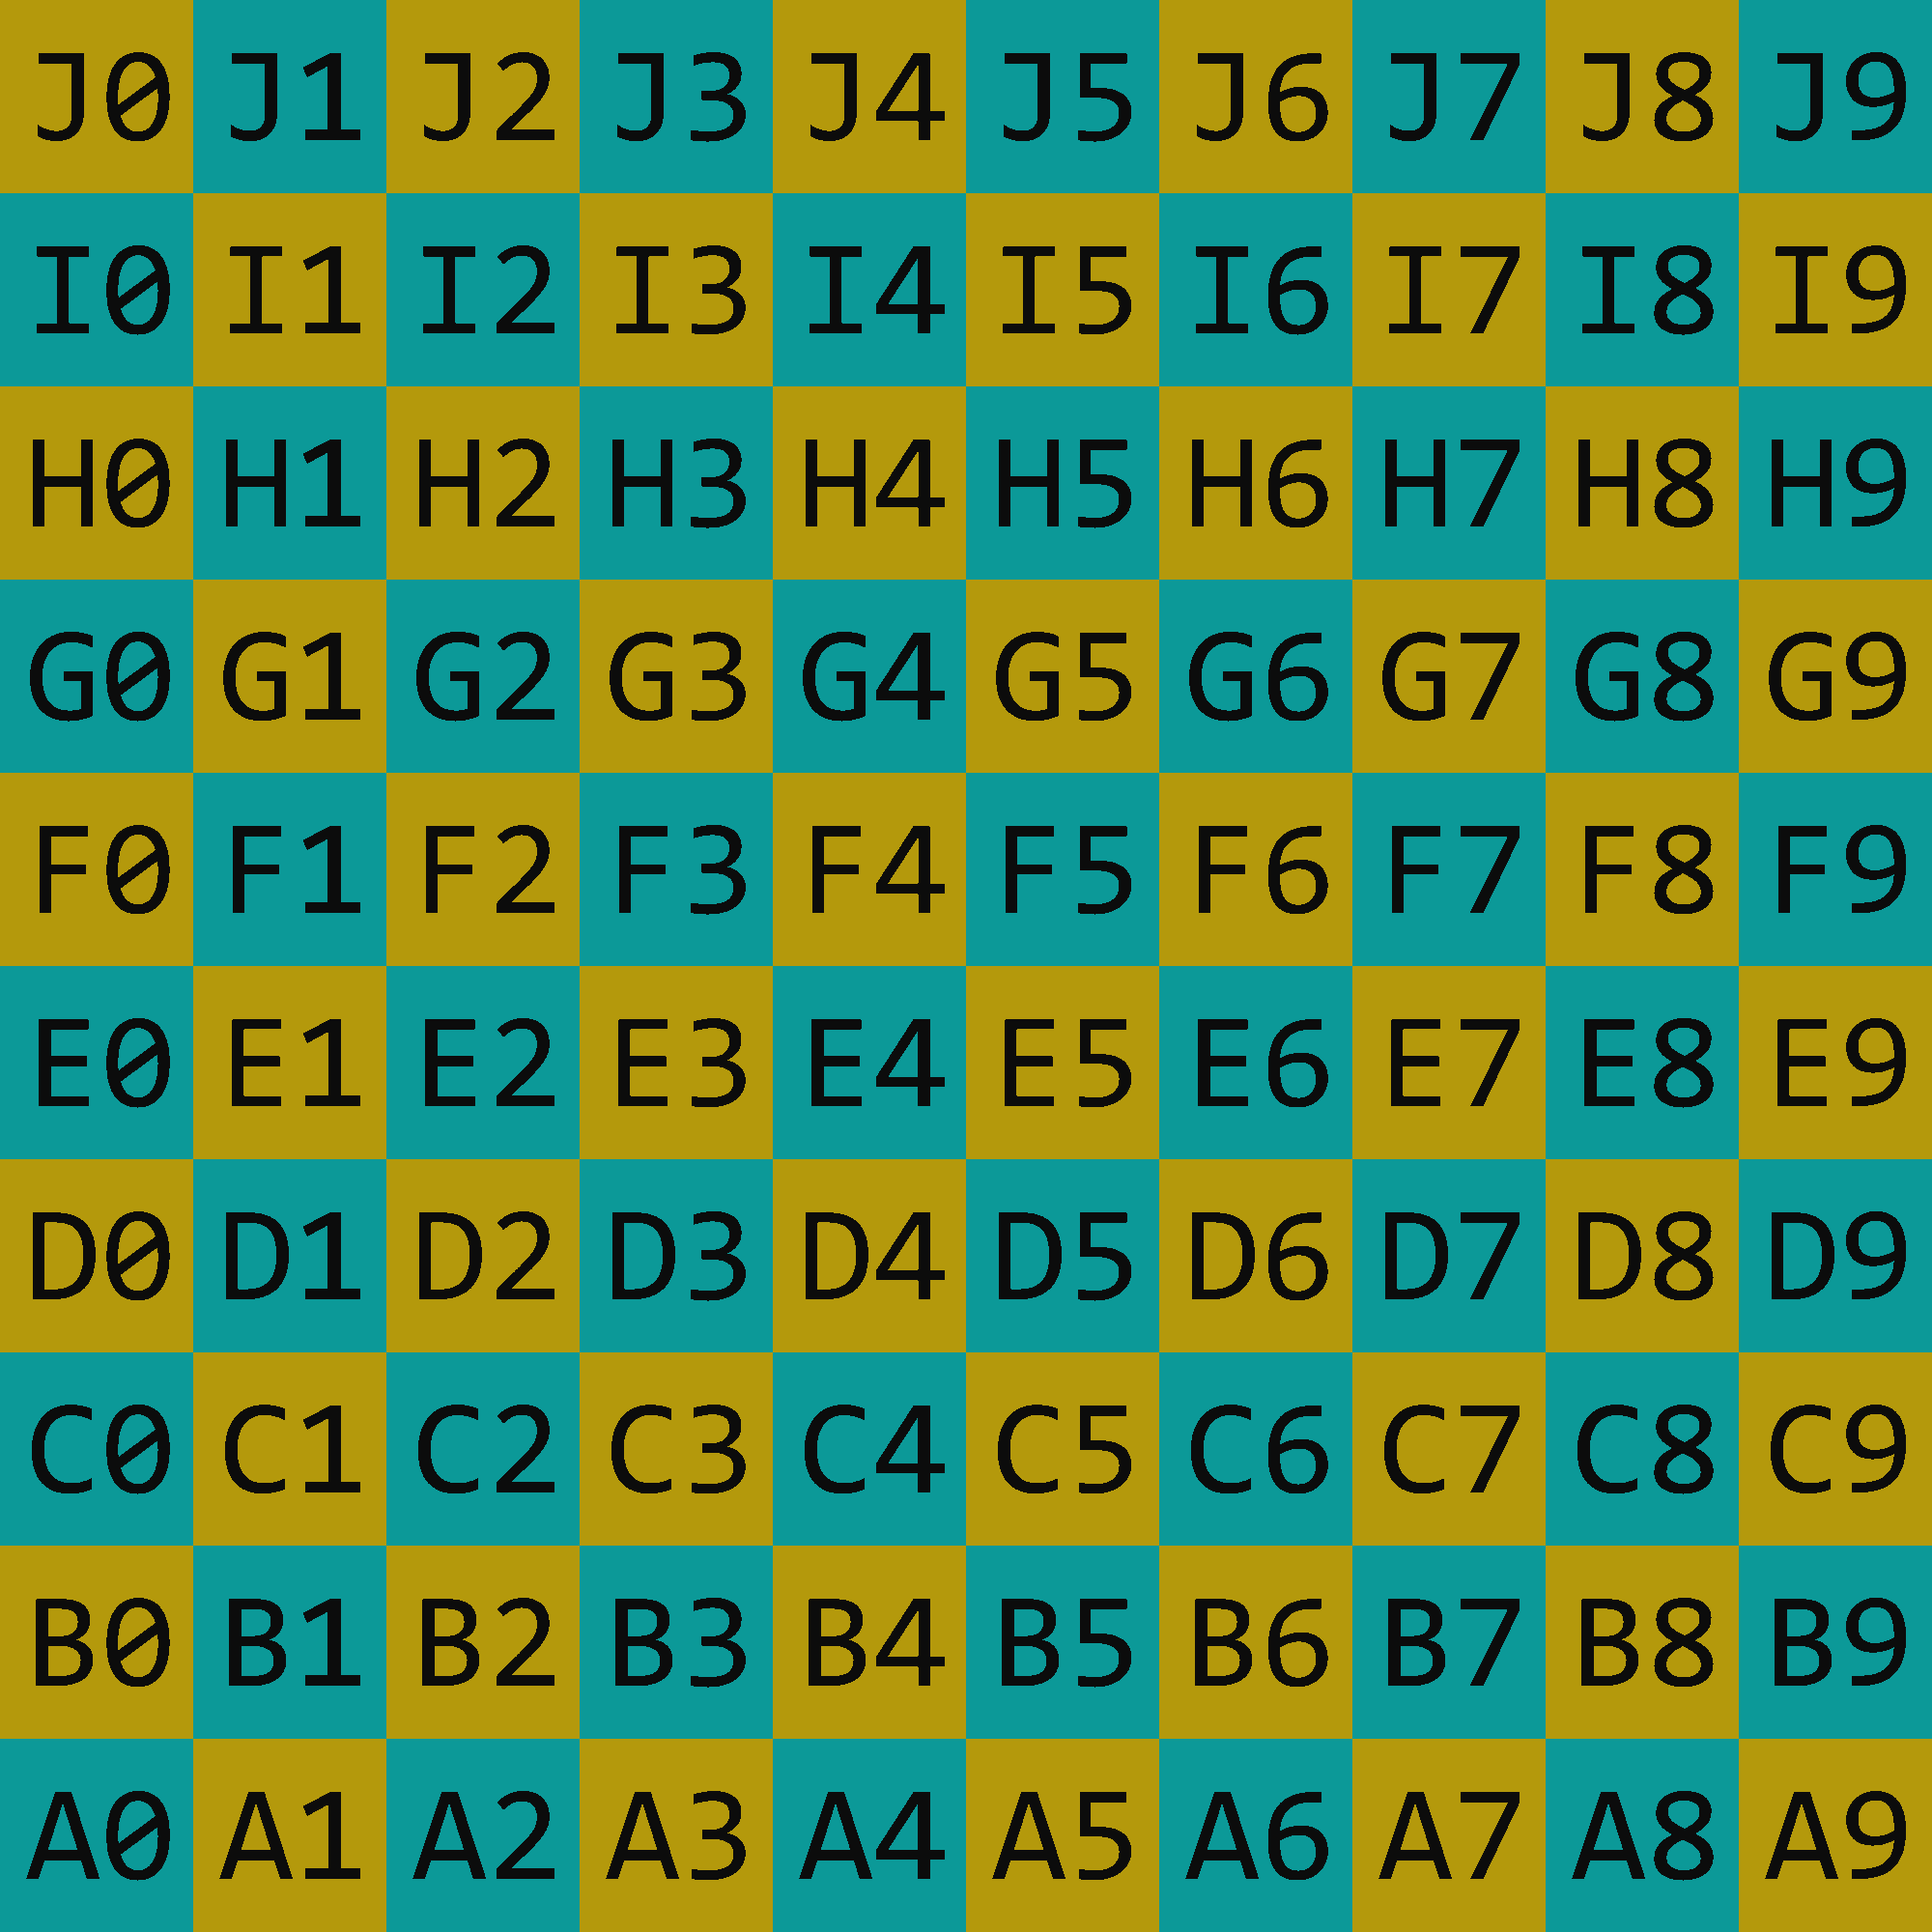

In [10]:
img

To use `np.where`, the first argument should be some Boolean array.  It seems easier to find the black colors than to find the background colors (because there is only one black color but there are two background colors).  Since `np.where` replaces both the `True` values and the `False` values, it doesn't really matter if we are using `mask` or `~mask` in the following; we would just need to swap the following inputs.

In [8]:
mask = (arr == [12, 12, 12]).all(axis=2)

In NumPy's preview display of `mask`, all of the values are `False`.  That is because there are no black pixels in the top 3 rows nor in the bottom 3 rows of `img`.

In [9]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Let's try something simple (no replacing of colors).  Let's just pass `arr` for both the `True` replacement as well as the `False` replacement.  Try reading the error message we get, and see if you can tell what the problem is.

In [11]:
np.where(mask, arr, arr)

ValueError: operands could not be broadcast together with shapes (2000,2000) (2000,2000,3) (2000,2000,3) 

In our earlier example, `A > 5` had the exact same shape as `100*A` and as `np.arange(len(A))`.  In our example here, `mask` does not have the same shape as `arr`.  There is no hope of using `reshape` on `mask` to get it into shape `(2000, 2000, 3)`, but we don't actually need them to have the same shape.  Instead, we just need them to be *broadcastable* to the same shape.

As it stands, the final (right-most) dimensions (2000 and 3) are not compatible in terms of broadcasting, but we can fix that easily by adding a new dimension of size `1` at the end of `mask`.  We add this third dimension using `reshape`.  (Aside: In the following, typing `2000` twice does not feel very robust.  I would rather type something involving `arr`.  Can you find a better approach?)

In [12]:
mask = (arr == [12, 12, 12]).all(axis=2).reshape(2000, 2000, 1)

The output of the following is not so important. (The output should be identical to `arr`; can you check that using `all`?)  More what I wanted to see is that the following does not raise an error, so the shapes are indeed compatible.

In [13]:
np.where(mask, arr, arr)

array([[[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       [[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       [[180, 153,  12],
        [180, 153,  12],
        [180, 153,  12],
        ...,
        [ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152]],

       ...,

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]],

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]],

       [[ 12, 153, 152],
        [ 12, 153, 152],
        [ 12, 153, 152],
        ...,
        [180, 153,  12],
        [180, 153,  12],
        [180, 153,  12]]

Now that we have our template, let's work on the `False` replacements (i.e., the background color replacements).  We want random background colors, so let's start by instantiating a NumPy random number generator.

In [14]:
rng = np.random.default_rng()

Our colors correspond to RGB triples, with integers between 0 and 255 (inclusive).  We want a 10-by-10 grid of random colors, so we will use shape `(10,10,3)`; think of this as a 10-by-10 matrix of random RGB values.

In [15]:
colors = rng.integers(256, size=(10,10,3))

We saw a few sections ago that every square has side-length 200, so we are going to repeat each color `200` times.  We will use the `repeat` method, which accepts an axis argument to say which axis to repeat along; we will repeat along both `axis=0` and `axis=1`.

Another way to think about this, is that we eventually want something broadcastable to shape `(2000, 2000, 3)`, and our `colors` variable has shape `(10, 10, 3)`, so it is natural to repeat `200` times in the rows and the columns dimensions.

In [18]:
Y = colors.repeat(200, axis=0).repeat(200, axis=1)

Notice how we can see that colors are now getting repeated.

In [19]:
Y

array([[[182, 207, 208],
        [182, 207, 208],
        [182, 207, 208],
        ...,
        [ 69, 118, 212],
        [ 69, 118, 212],
        [ 69, 118, 212]],

       [[182, 207, 208],
        [182, 207, 208],
        [182, 207, 208],
        ...,
        [ 69, 118, 212],
        [ 69, 118, 212],
        [ 69, 118, 212]],

       [[182, 207, 208],
        [182, 207, 208],
        [182, 207, 208],
        ...,
        [ 69, 118, 212],
        [ 69, 118, 212],
        [ 69, 118, 212]],

       ...,

       [[231, 209, 153],
        [231, 209, 153],
        [231, 209, 153],
        ...,
        [111, 105,  86],
        [111, 105,  86],
        [111, 105,  86]],

       [[231, 209, 153],
        [231, 209, 153],
        [231, 209, 153],
        ...,
        [111, 105,  86],
        [111, 105,  86],
        [111, 105,  86]],

       [[231, 209, 153],
        [231, 209, 153],
        [231, 209, 153],
        ...,
        [111, 105,  86],
        [111, 105,  86],
        [111, 105,  86]]

Recall that `colors` had shape `(10, 10, 3)`; we passed that tuple explicitly to `rng.integers`.

In [21]:
colors.shape

(10, 10, 3)

After our repetitions, `Y` now has shape `(2000, 2000, 3)`.

In [20]:
Y.shape

(2000, 2000, 3)

The NumPy array `Y` contains what we are going to use to replace the `False` values with (`True` corresponded to the black colors, and `False` corresponded to the other two cololrs).  So `Y` is the final argument to `np.where`.  The only other thing we need to do, to get an image out of this, is to make sure it has the correct `dtype` of unsigned 8-bit integers.  We do that here using the `astype` argument.  (Another option, which we used before, would be to do this in two steps, where the second step is setting the `dtype`.)

Here is the resulting image.

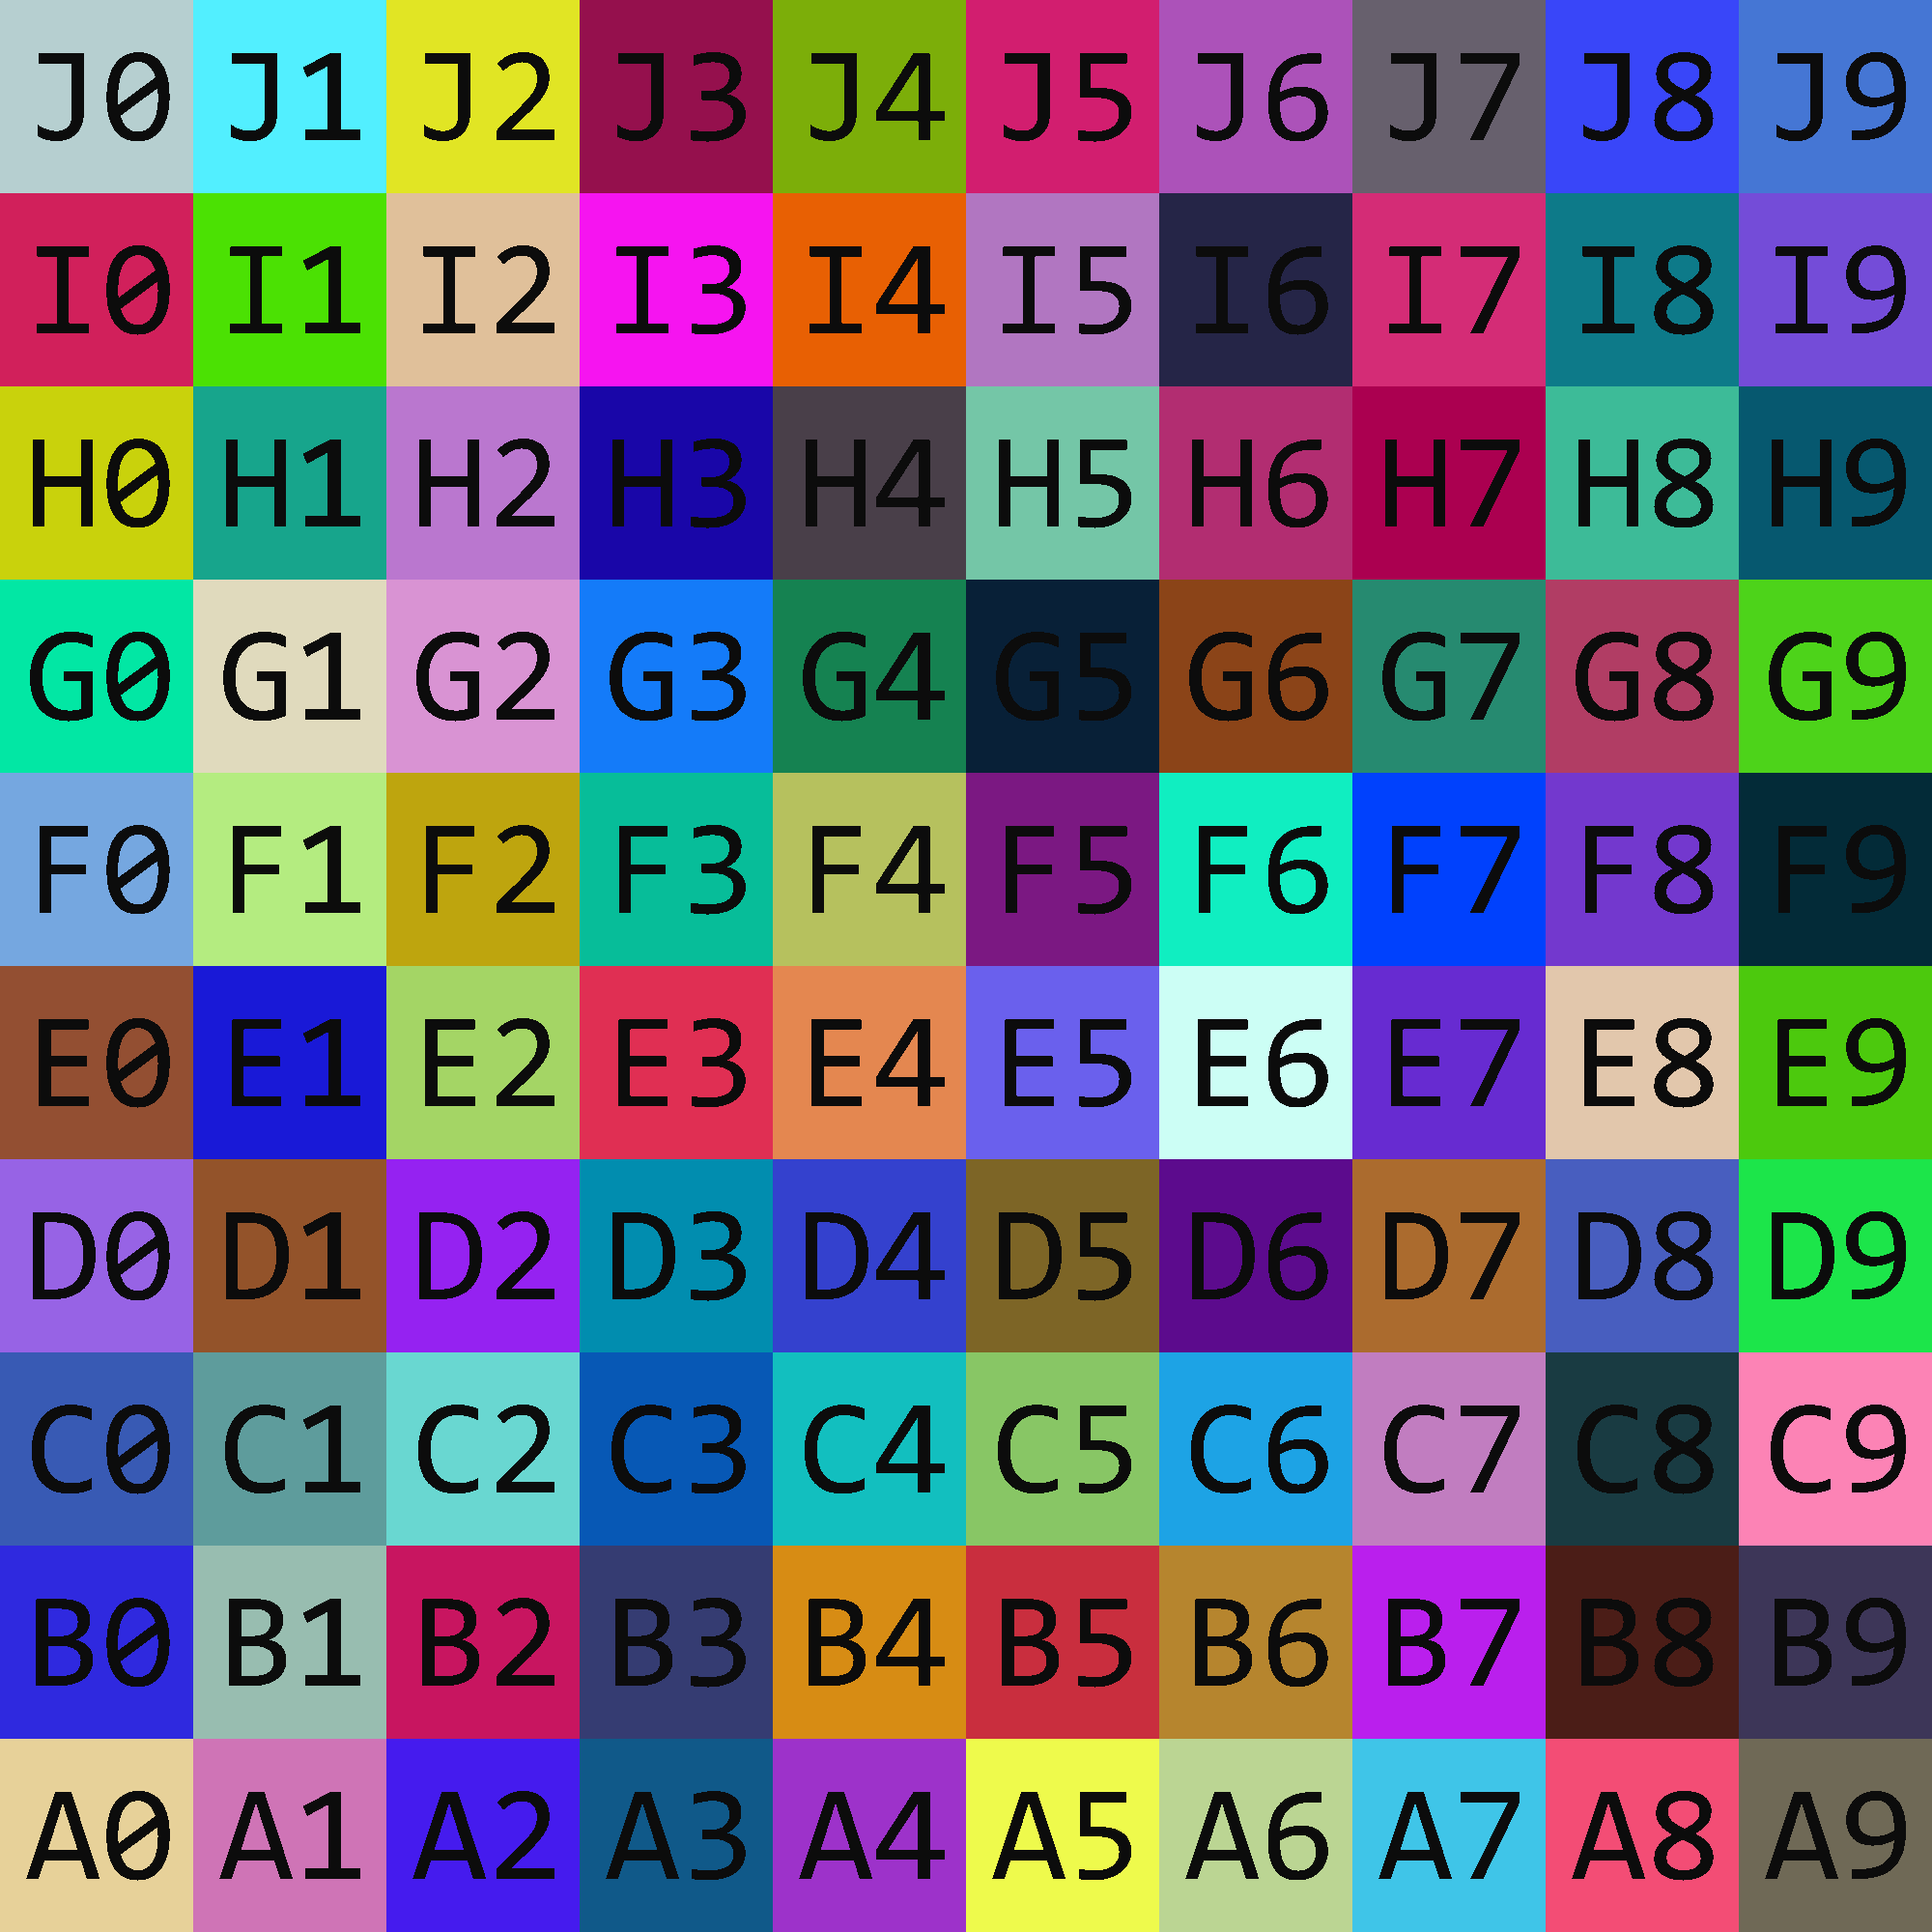

In [24]:
Image.fromarray(np.where(mask, arr, Y).astype(np.uint8))